In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore") 
get_ipython().run_line_magic('matplotlib', 'inline')

plt.rcParams['font.sans-serif']=['SimHei'] #  正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #  正常显示负号
 
import plotly as py 
import plotly.graph_objs as go 
pyplt = py.offline.iplot 
from pylab import * 
from sklearn import metrics 
from pprint import pprint


# 一.数据概况

In [2]:
# 读取数据
df=pd.read_csv('./cs-training.csv',sep=',')
df.rename(columns={'Unnamed: 0':'ID'},inplace=True) 
df.head()

ID  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0   1                 1                              0.766127   45   
1   2                 0                              0.957151   40   
2   3                 0                              0.658180   38   
3   4                 0                              0.233810   30   
4   5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                                4                        0   
2                                2                        1   
3                                5                        0   
4                                7                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             6                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             1                                     0   

   NumberOfDependents  
0                 2.0  
1                 1.0  
2                 0.0  
3                 0.0  
4                 0.0

# 二.数据清洗

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [4]:
print("Rows      :", df.shape[0]) 
print("Columns   :", df.shape[1]) 

Rows      : 150000
Columns   : 12


In [5]:
print("\n Features : \n", df.columns.tolist()) 
print("\n Missing values :    ", df.isnull().sum().values.sum()) 
print("\n Unique   values : \n", df.nunique()) 


 Features : 
 ['ID', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']

 Missing values :     33655

 Unique   values : 
 ID                                      150000
SeriousDlqin2yrs                             2
RevolvingUtilizationOfUnsecuredLines    125728
age                                         86
NumberOfTime30-59DaysPastDueNotWorse        16
DebtRatio                               114194
MonthlyIncome                            13594
NumberOfOpenCreditLinesAndLoans             58
NumberOfTimes90DaysLate                     19
NumberRealEstateLoansOrLines                28
NumberOfTime60-89DaysPastDueNotWorse        13
NumberOfDependents                          13
dtype: int64


## 1. 寻找存在缺失值的列

In [6]:
Missing_value_col = []

for i in df.columns:
    if df[i].isnull().sum()>0:
        Missing_value_col.append(i)
print("Features with missing values:", Missing_value_col)

Features with missing values: ['MonthlyIncome', 'NumberOfDependents']


In [7]:
df[Missing_value_col].isnull().sum() 

MonthlyIncome         29731
NumberOfDependents     3924
dtype: int64

In [8]:
df.fillna({'MonthlyIncome': df.MonthlyIncome.dropna().mode()[0],
           'NumberOfDependents': df.NumberOfDependents.dropna().mode()[0]},inplace = True) 

print('Number of missing values after filling: ', df.isnull().sum()) 

Number of missing values after filling:  ID                                      0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         150000 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

## 2. 各字段分布情况

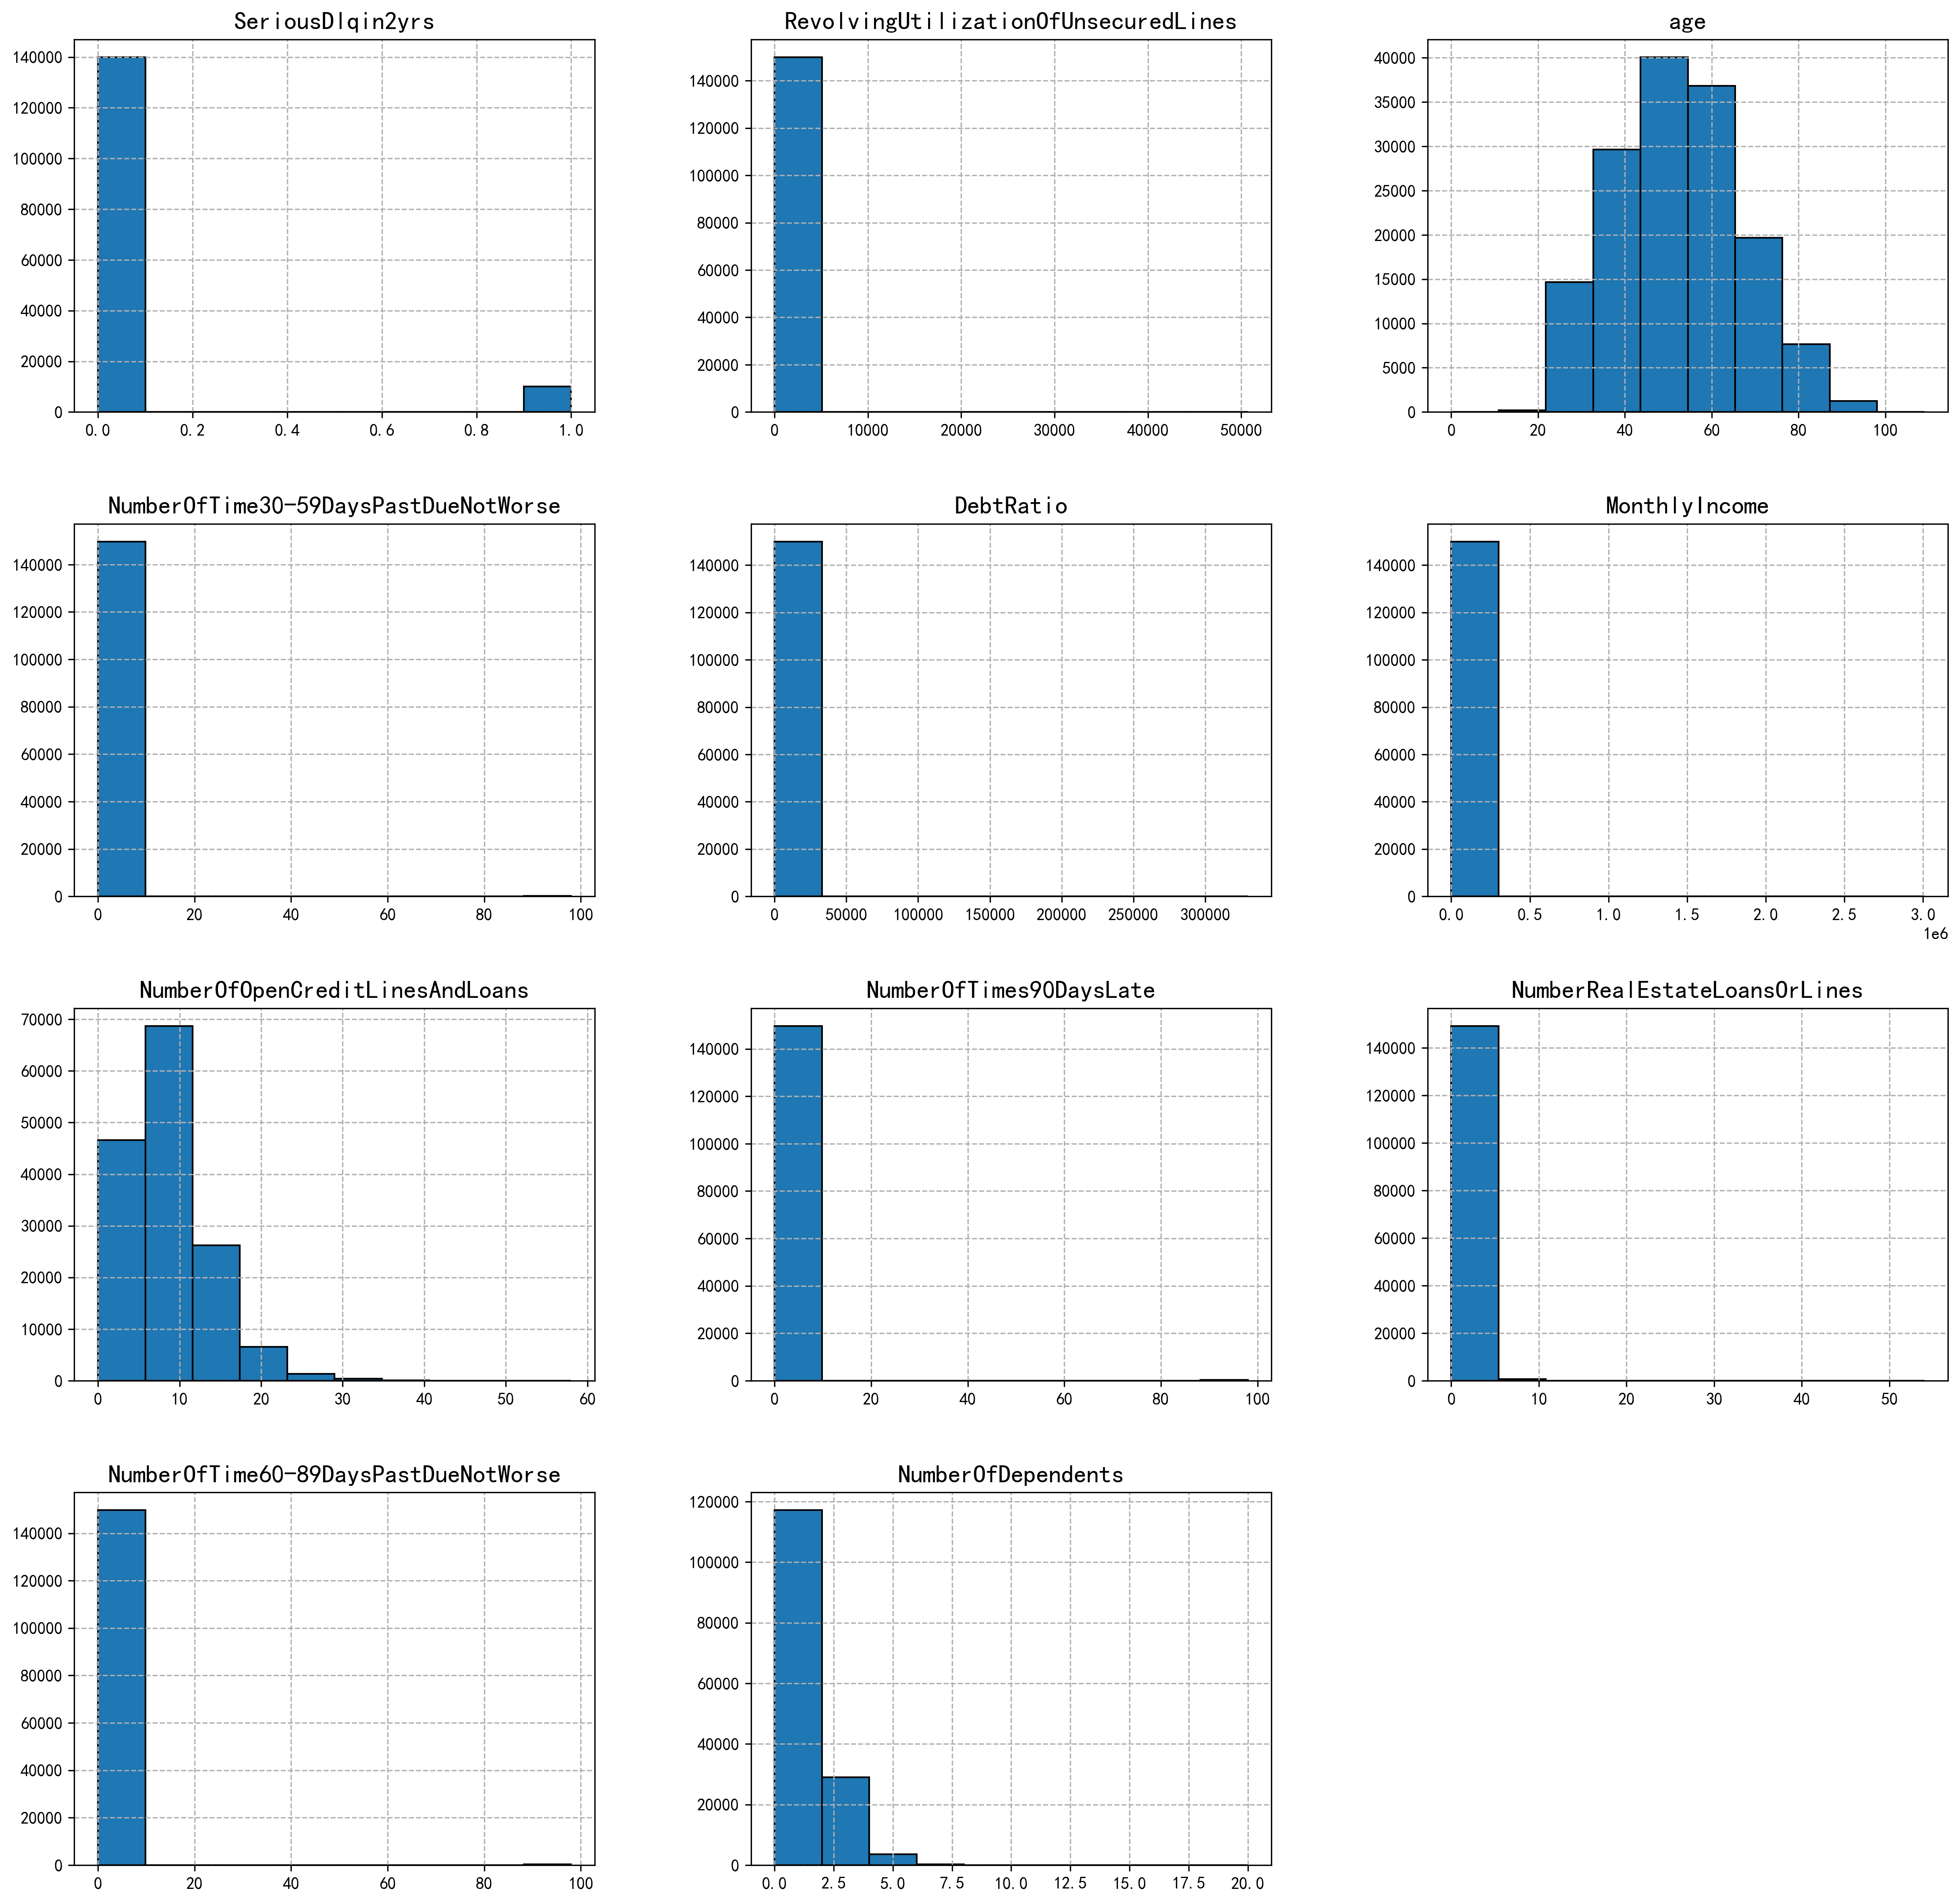

In [10]:
plt.figure(figsize=(20,20),dpi=300) 
plt.subplots_adjust(wspace =0.3, hspace =0.3) 

for n,i in enumerate(df.drop(["ID"], axis=1).columns): 
     plt.subplot(4,3,n+1) 
     plt.title(i,fontsize=15) 
     plt.grid(linestyle='--') 
     df[i].hist(edgecolor='k') 

## 3. 查看共线性

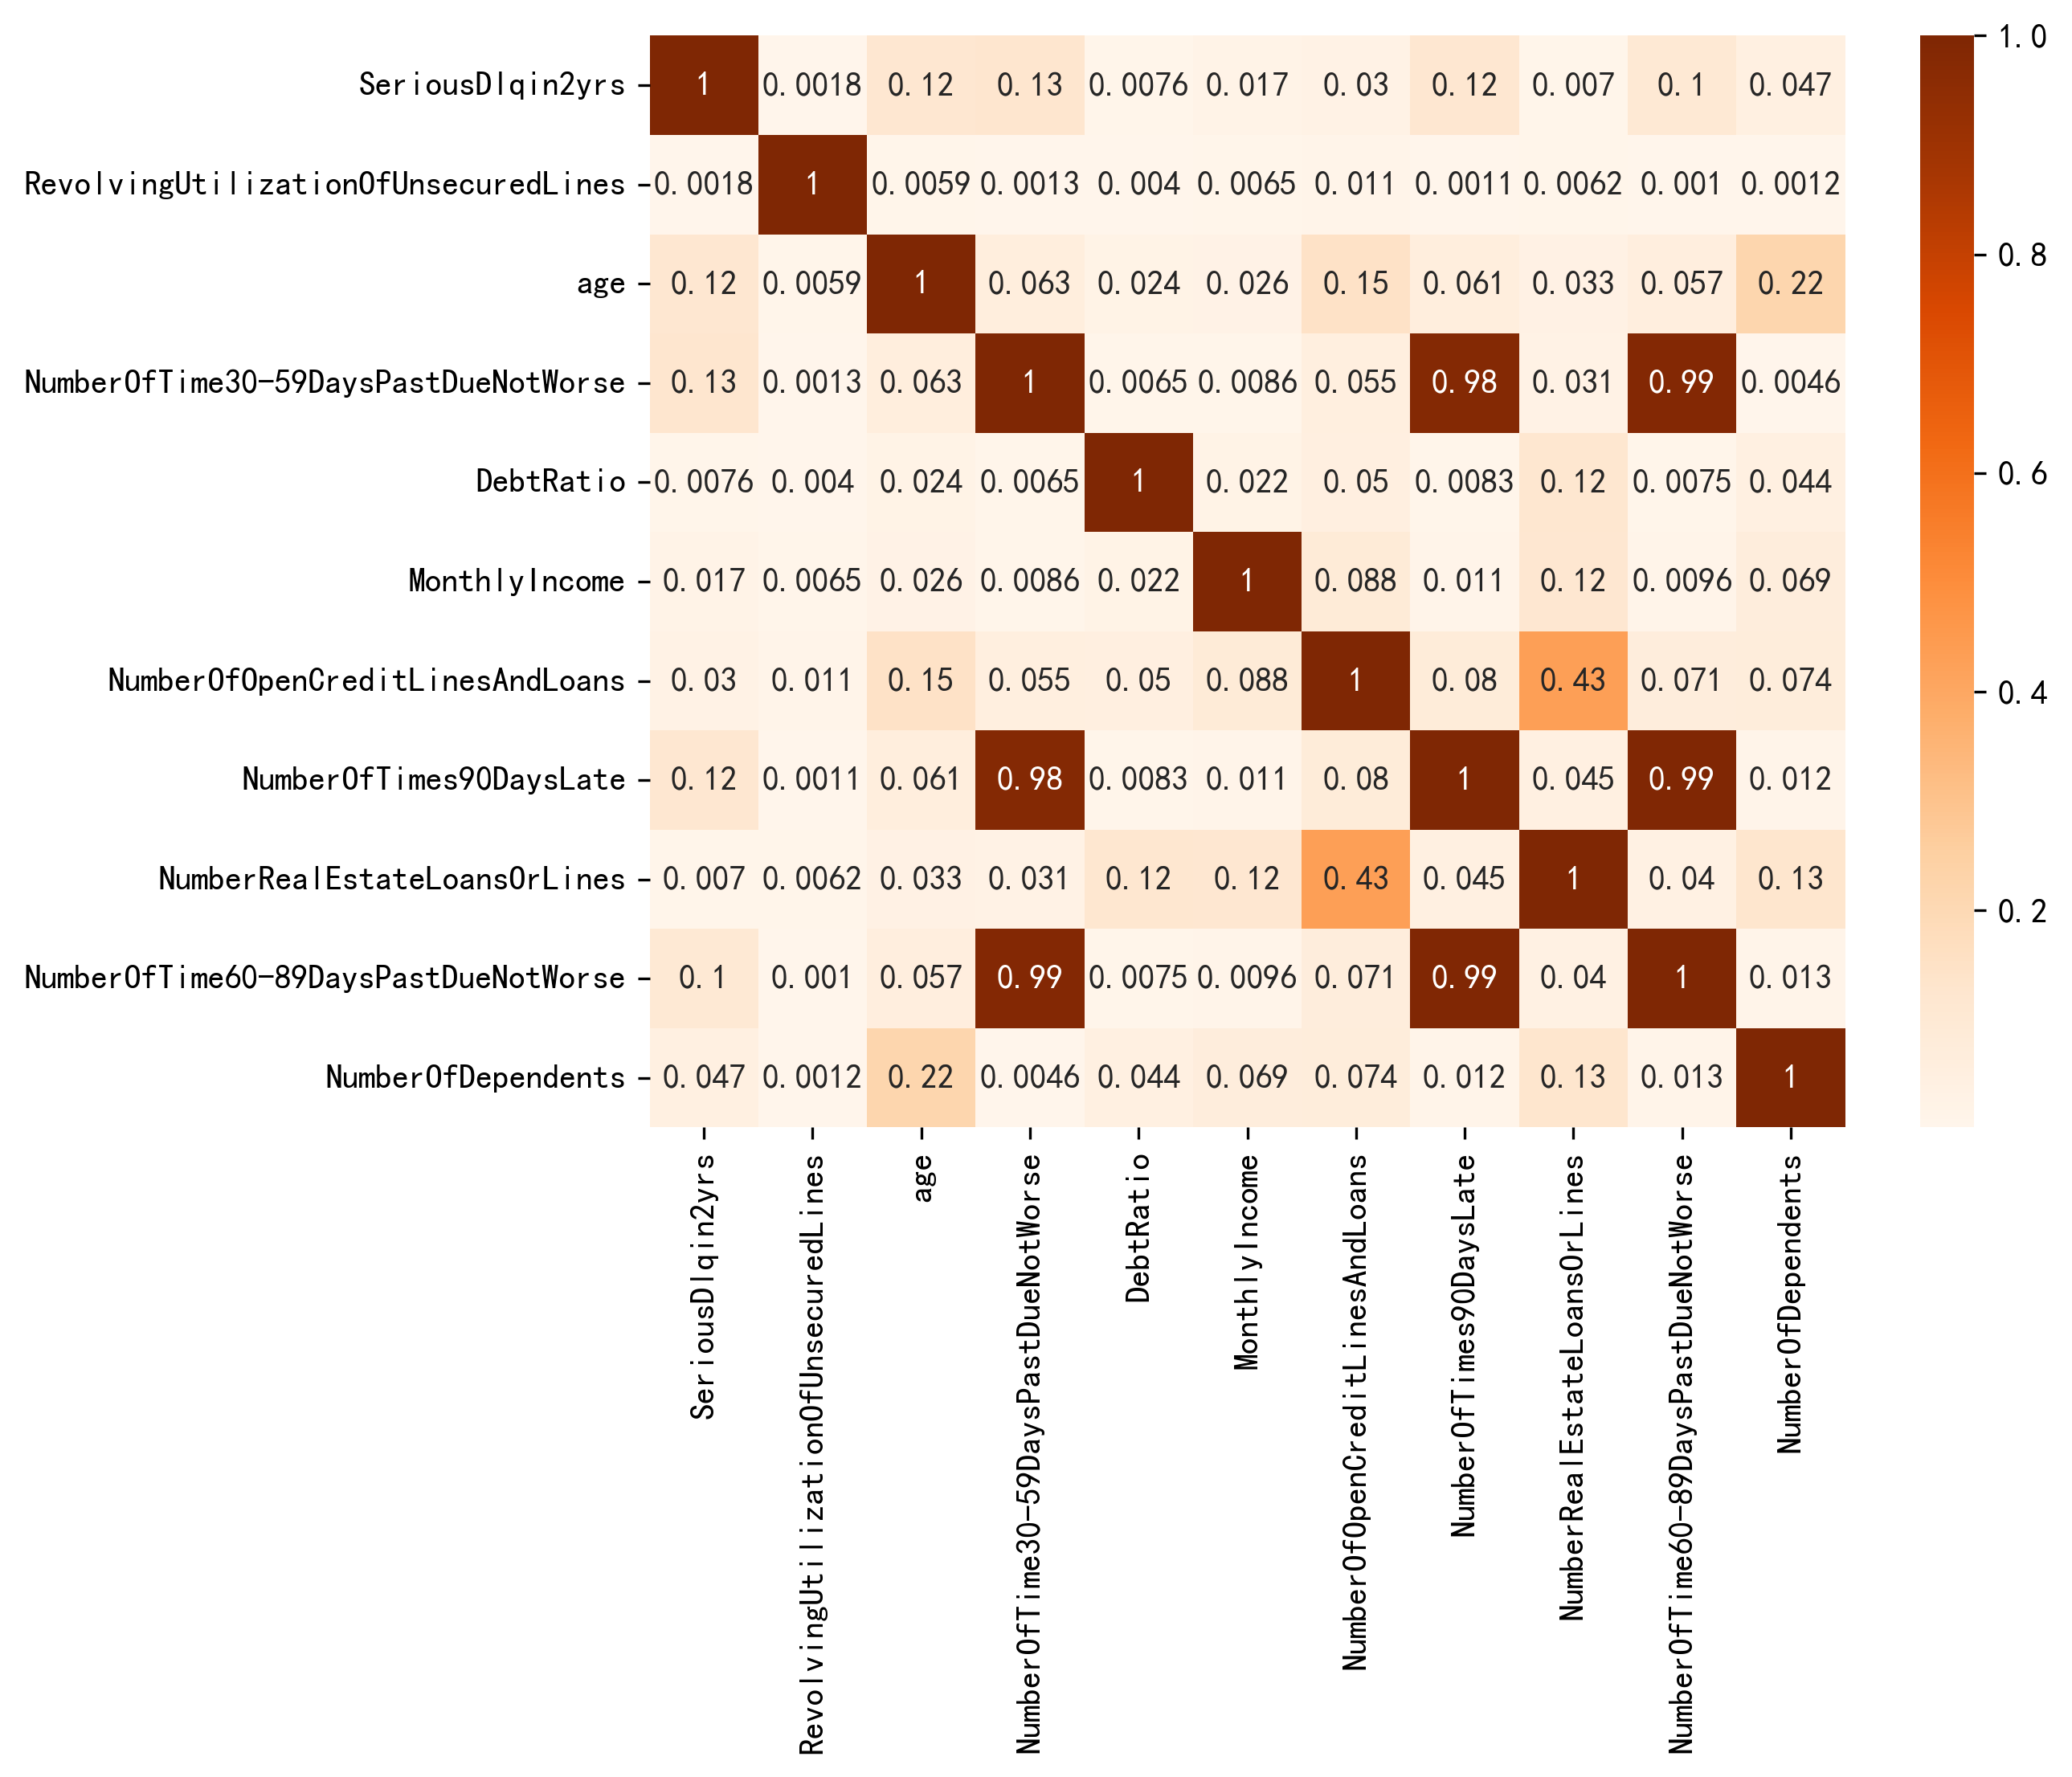

In [11]:
plt.subplots(figsize=(8,6),dpi=300) 
sns.heatmap(df.drop(["ID"],axis=1).corr().abs(),cmap='Oranges',annot=True) 
# plt.savefig('./Figures/The heat map of correlation coefficients between feaatures.jpg')
plt.show() 

## 4. 构造新特征消除共线性

                                      PastdueRatio  \
PastdueRatio                              1.000000   
NumberOfTime30-59DaysPastDueNotWorse      0.179137   

                                      NumberOfTime30-59DaysPastDueNotWorse  
PastdueRatio                                                      0.179137  
NumberOfTime30-59DaysPastDueNotWorse                              1.000000  


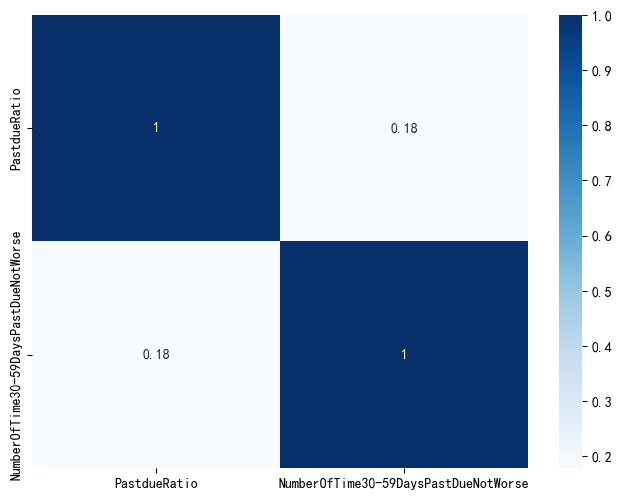

In [12]:
def collineation_processing(df,col,col1,col2,name): 
    def trans2percent(row): 
            if row[col2] == 0: 
                 return 0 
            else: 
                 return row[col1] / row[col2] 
        
    df[name] = df.apply(trans2percent,axis=1) 
    pprint(df[[name,col]].corr()) 

    plt.subplots(figsize=(8,6), dpi=100) 
    sns.heatmap(df[[name,col]].corr().abs(),cmap='Blues',annot=True) 
    plt.savefig('./Figures/The heat map of correlation coefficients with covariance removed.jpg')
    
        
collineation_processing(df,'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'PastdueRatio')

df = df.drop(['NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate'], axis=1)

In [13]:
df.head()

ID  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0   1                 1                              0.766127   45   
1   2                 0                              0.957151   40   
2   3                 0                              0.658180   38   
3   4                 0                              0.233810   30   
4   5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberRealEstateLoansOrLines  \
0                               13                             6   
1                                4                             0   
2                                2                             0   
3                                5                             0   
4                                7                             1   

   NumberOfDependents  PastdueRatio  
0                 2.0           0.0  
1                 1.0           0.0  
2                 0.0           0.0  
3                 0.0           0.0  
4                 0.0           0.0

## 5. 异常值检测

* 箱线图

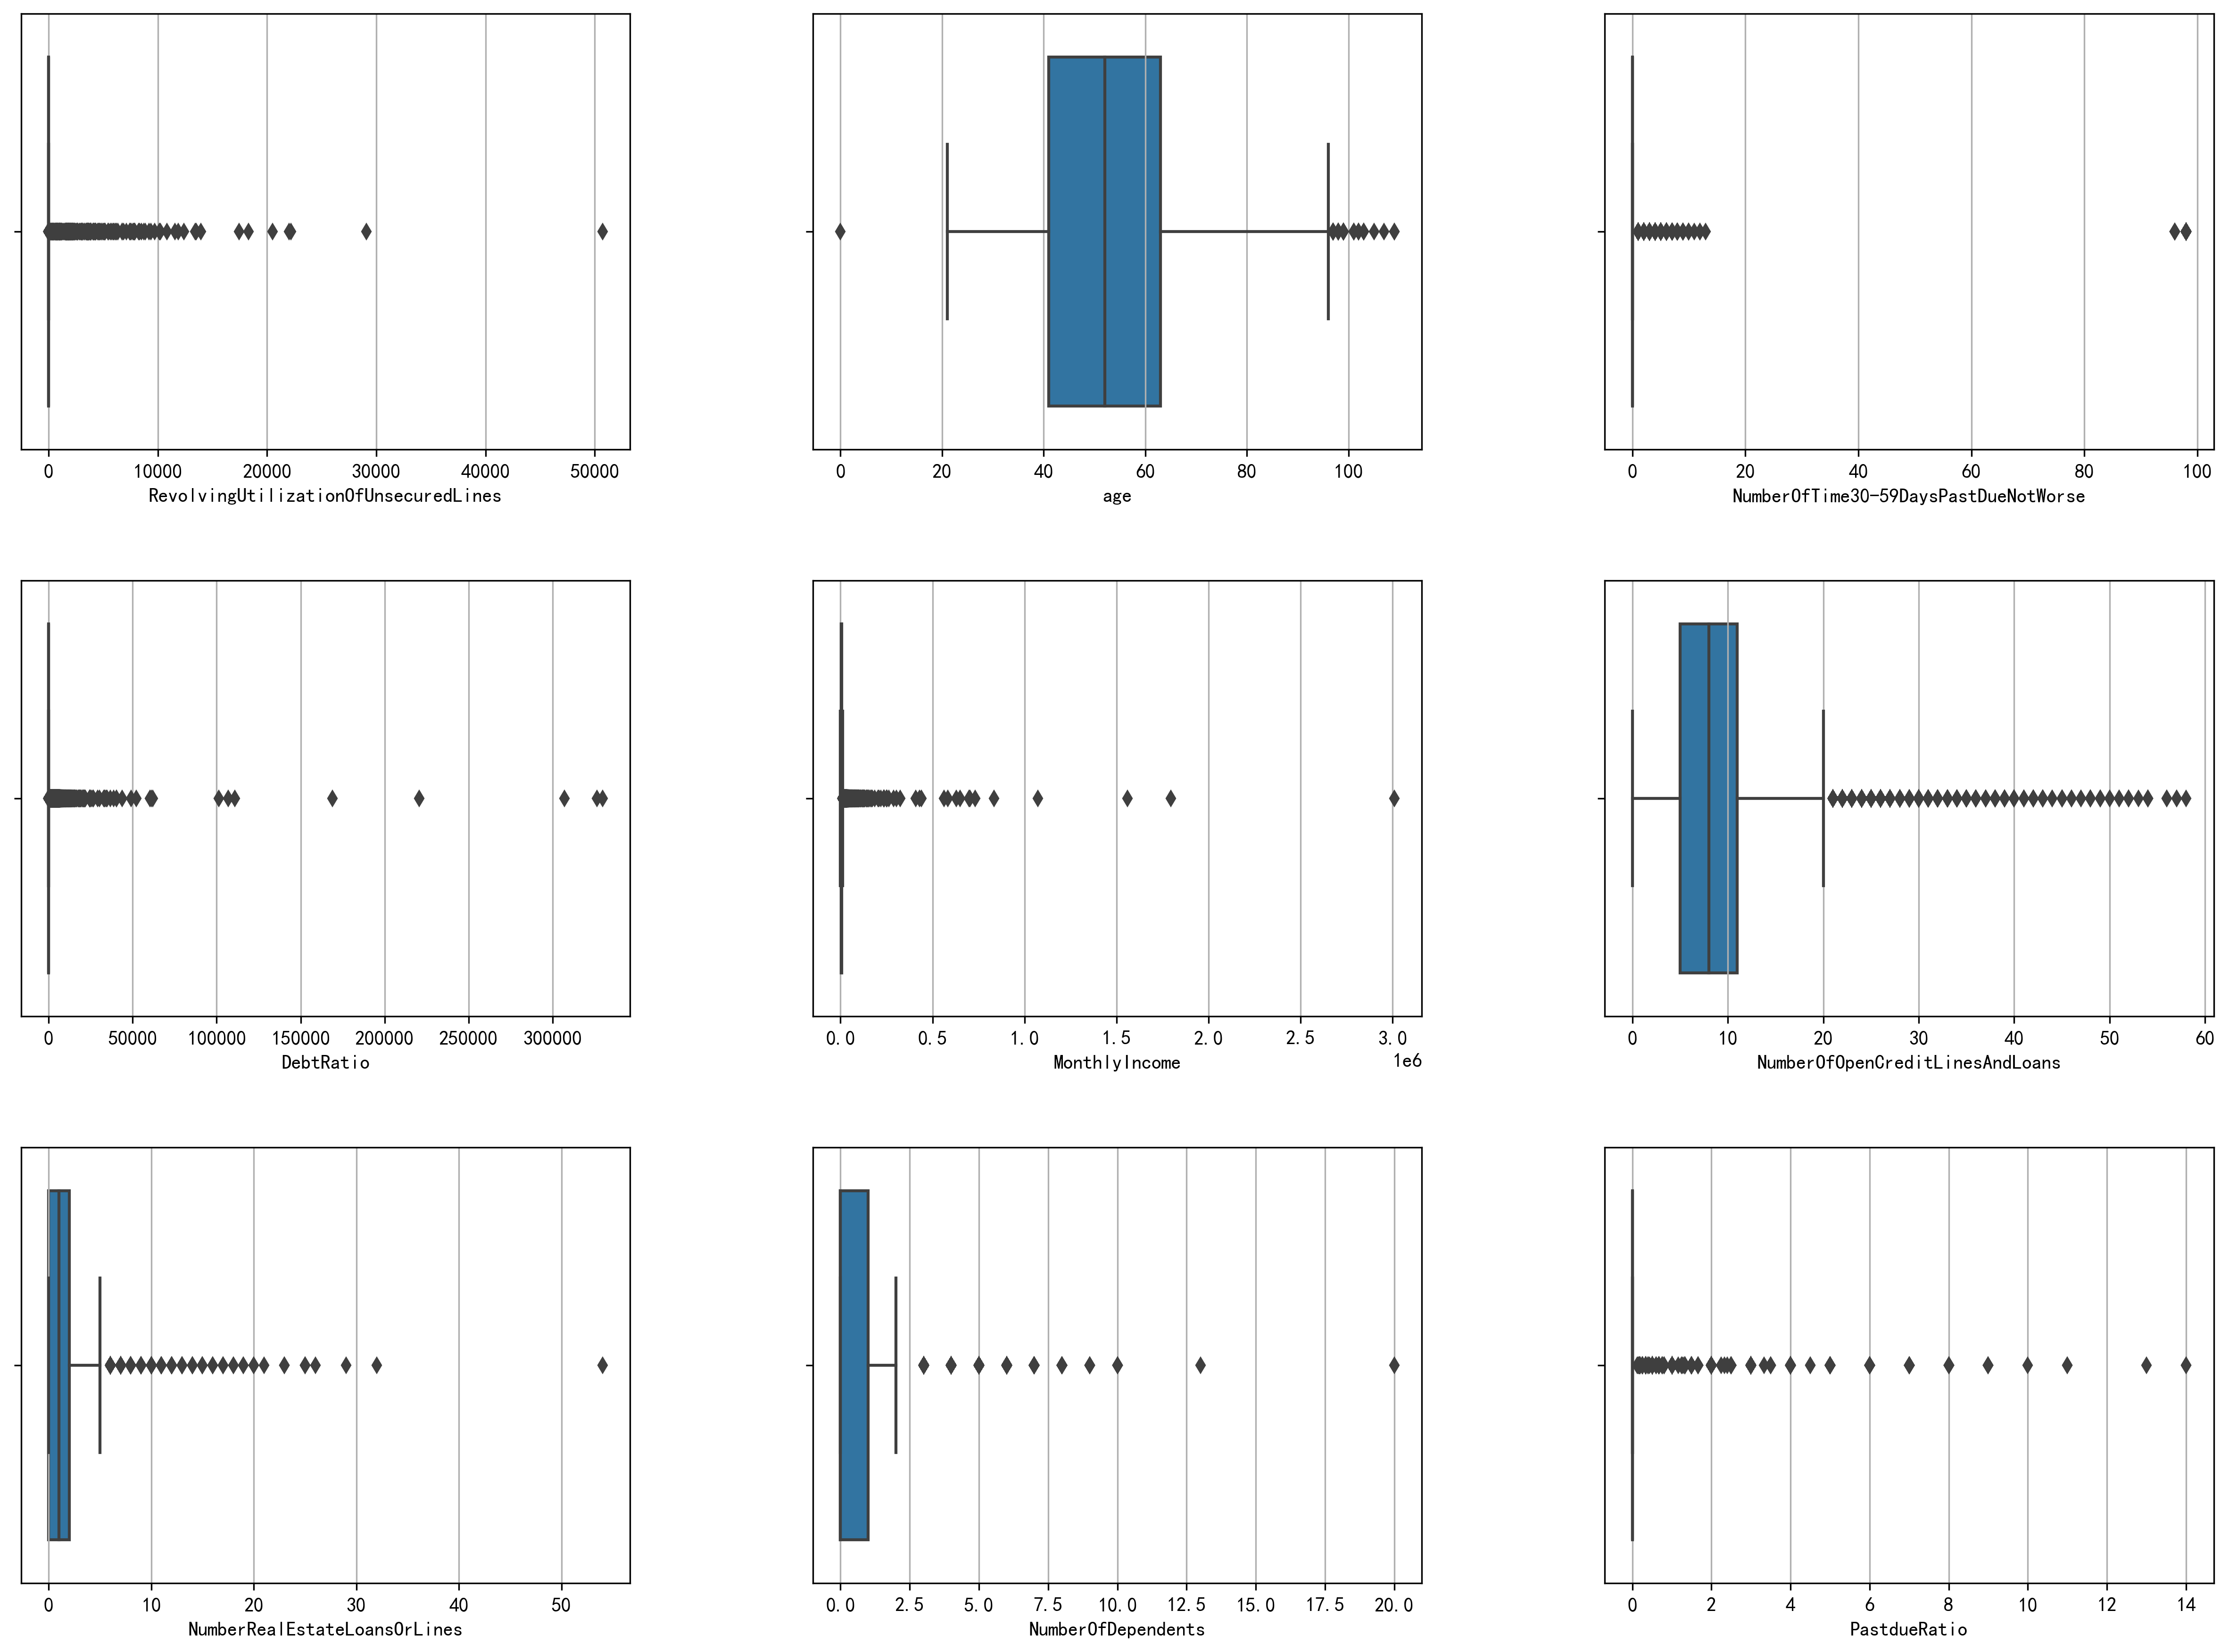

In [14]:
plt.figure(figsize=(20,20),dpi=300) 
plt.subplots_adjust(wspace =0.3, hspace =0.3) 
for n,i in enumerate(df.drop(['ID', 'SeriousDlqin2yrs'], axis=1).columns): 
     plt.subplot(4,3,n+1) 
     plt.grid(linestyle='-') 
     sns.boxplot(df[i],orient='v')
     plt.savefig('./Figures/The boxplot for each feature.jpg',dpi=400, bbox_inches='tight')

In [15]:
def show_error(df,col,whis=1.5,show=False): 
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    upper = df[col].quantile(0.75) + whis*iqr 
    lower = df[col].quantile(0.25) - whis*iqr
    print(iqr,upper,lower)
    
    print('[',col,'], Total outliers number of upper limit: ', df[col][df[col] > upper].count())
    if show:
          print('Outlier examples: \n', df[df[col] > upper].head().T)
          

    print('[',col,'], Total outliers number of lower limit: ', df[col][df[col] < lower].count())
    if show:
          print('Outlier examples: \n', df[df[col] < lower].head().T)
    print('- - - - - - - - - - - - - ') 
    
n = len(df) # 计数器

### 5.1 RevolvingUtilizationOfUnsecuredLines 可用信贷额度

In [16]:
show_error(df,'RevolvingUtilizationOfUnsecuredLines')
df = df.loc[df['RevolvingUtilizationOfUnsecuredLines'] < 1.4]

0.5291788055 1.35281445575 -0.7639007662499999
[ RevolvingUtilizationOfUnsecuredLines ], Total outliers number of upper limit:  763
[ RevolvingUtilizationOfUnsecuredLines ], Total outliers number of lower limit:  0
- - - - - - - - - - - - - 


### 5.2 age 年龄

In [17]:
show_error(df,'age') 
df = df.loc[(df['age'] > 18) & (df['age'] < 100)]

22.0 96.0 8.0
[ age ], Total outliers number of upper limit:  45
[ age ], Total outliers number of lower limit:  1
- - - - - - - - - - - - - 


### 5.3 NumberOfTime30-59DaysPastDueNotWorse 逾期30-59天的笔数

In [18]:
show_error(df,'NumberOfTime30-59DaysPastDueNotWorse') 
df = df.loc[df['NumberOfTime30-59DaysPastDueNotWorse'] < 15]

0.0 0.0 0.0
[ NumberOfTime30-59DaysPastDueNotWorse ], Total outliers number of upper limit:  23712
[ NumberOfTime30-59DaysPastDueNotWorse ], Total outliers number of lower limit:  0
- - - - - - - - - - - - - 


### 5.4 DebtRatio 负债率

In [19]:
show_error(df,'DebtRatio') 
df = df.loc[df['DebtRatio'] < 3000]

0.6923701284999999 1.9070212332499998 -0.8624592807499998
[ DebtRatio ], Total outliers number of upper limit:  31099
[ DebtRatio ], Total outliers number of lower limit:  0
- - - - - - - - - - - - - 


### 5.5 MonthlyIncome 月收入

In [20]:
show_error(df,'MonthlyIncome') 
df = df.loc[df['MonthlyIncome'] < 50000]

3678.0 13017.0 -1695.0
[ MonthlyIncome ], Total outliers number of upper limit:  8218
[ MonthlyIncome ], Total outliers number of lower limit:  0
- - - - - - - - - - - - - 


### 5.6 NumberOfOpenCreditLinesAndLoans 开放信贷数量

In [21]:
show_error(df,'NumberOfOpenCreditLinesAndLoans') 
df = df.loc[df['NumberOfOpenCreditLinesAndLoans'] < 30]

6.0 20.0 -4.0
[ NumberOfOpenCreditLinesAndLoans ], Total outliers number of upper limit:  3646
[ NumberOfOpenCreditLinesAndLoans ], Total outliers number of lower limit:  0
- - - - - - - - - - - - - 


### 5.7 NumberRealEstateLoansOrLines 不动产贷款数

In [22]:
show_error(df,'NumberRealEstateLoansOrLines') 
df = df.loc[df['NumberRealEstateLoansOrLines'] < 10]

2.0 5.0 -3.0
[ NumberRealEstateLoansOrLines ], Total outliers number of upper limit:  622
[ NumberRealEstateLoansOrLines ], Total outliers number of lower limit:  0
- - - - - - - - - - - - - 


### 5.8 NumberOfDependents 家属数量

In [23]:
show_error(df,'NumberOfDependents') 
df = df.loc[df['NumberOfDependents'] < 10]

1.0 2.5 -1.5
[ NumberOfDependents ], Total outliers number of upper limit:  12807
[ NumberOfDependents ], Total outliers number of lower limit:  0
- - - - - - - - - - - - - 


## 6. 删除异常值

In [24]:
df.dropna(inplace=True) 
df.reset_index(drop=True,inplace=True)
print('Total data deleted', n-len(df))
print(df.shape)

Total data deleted 7044
(142956, 11)


* 核密度曲线图

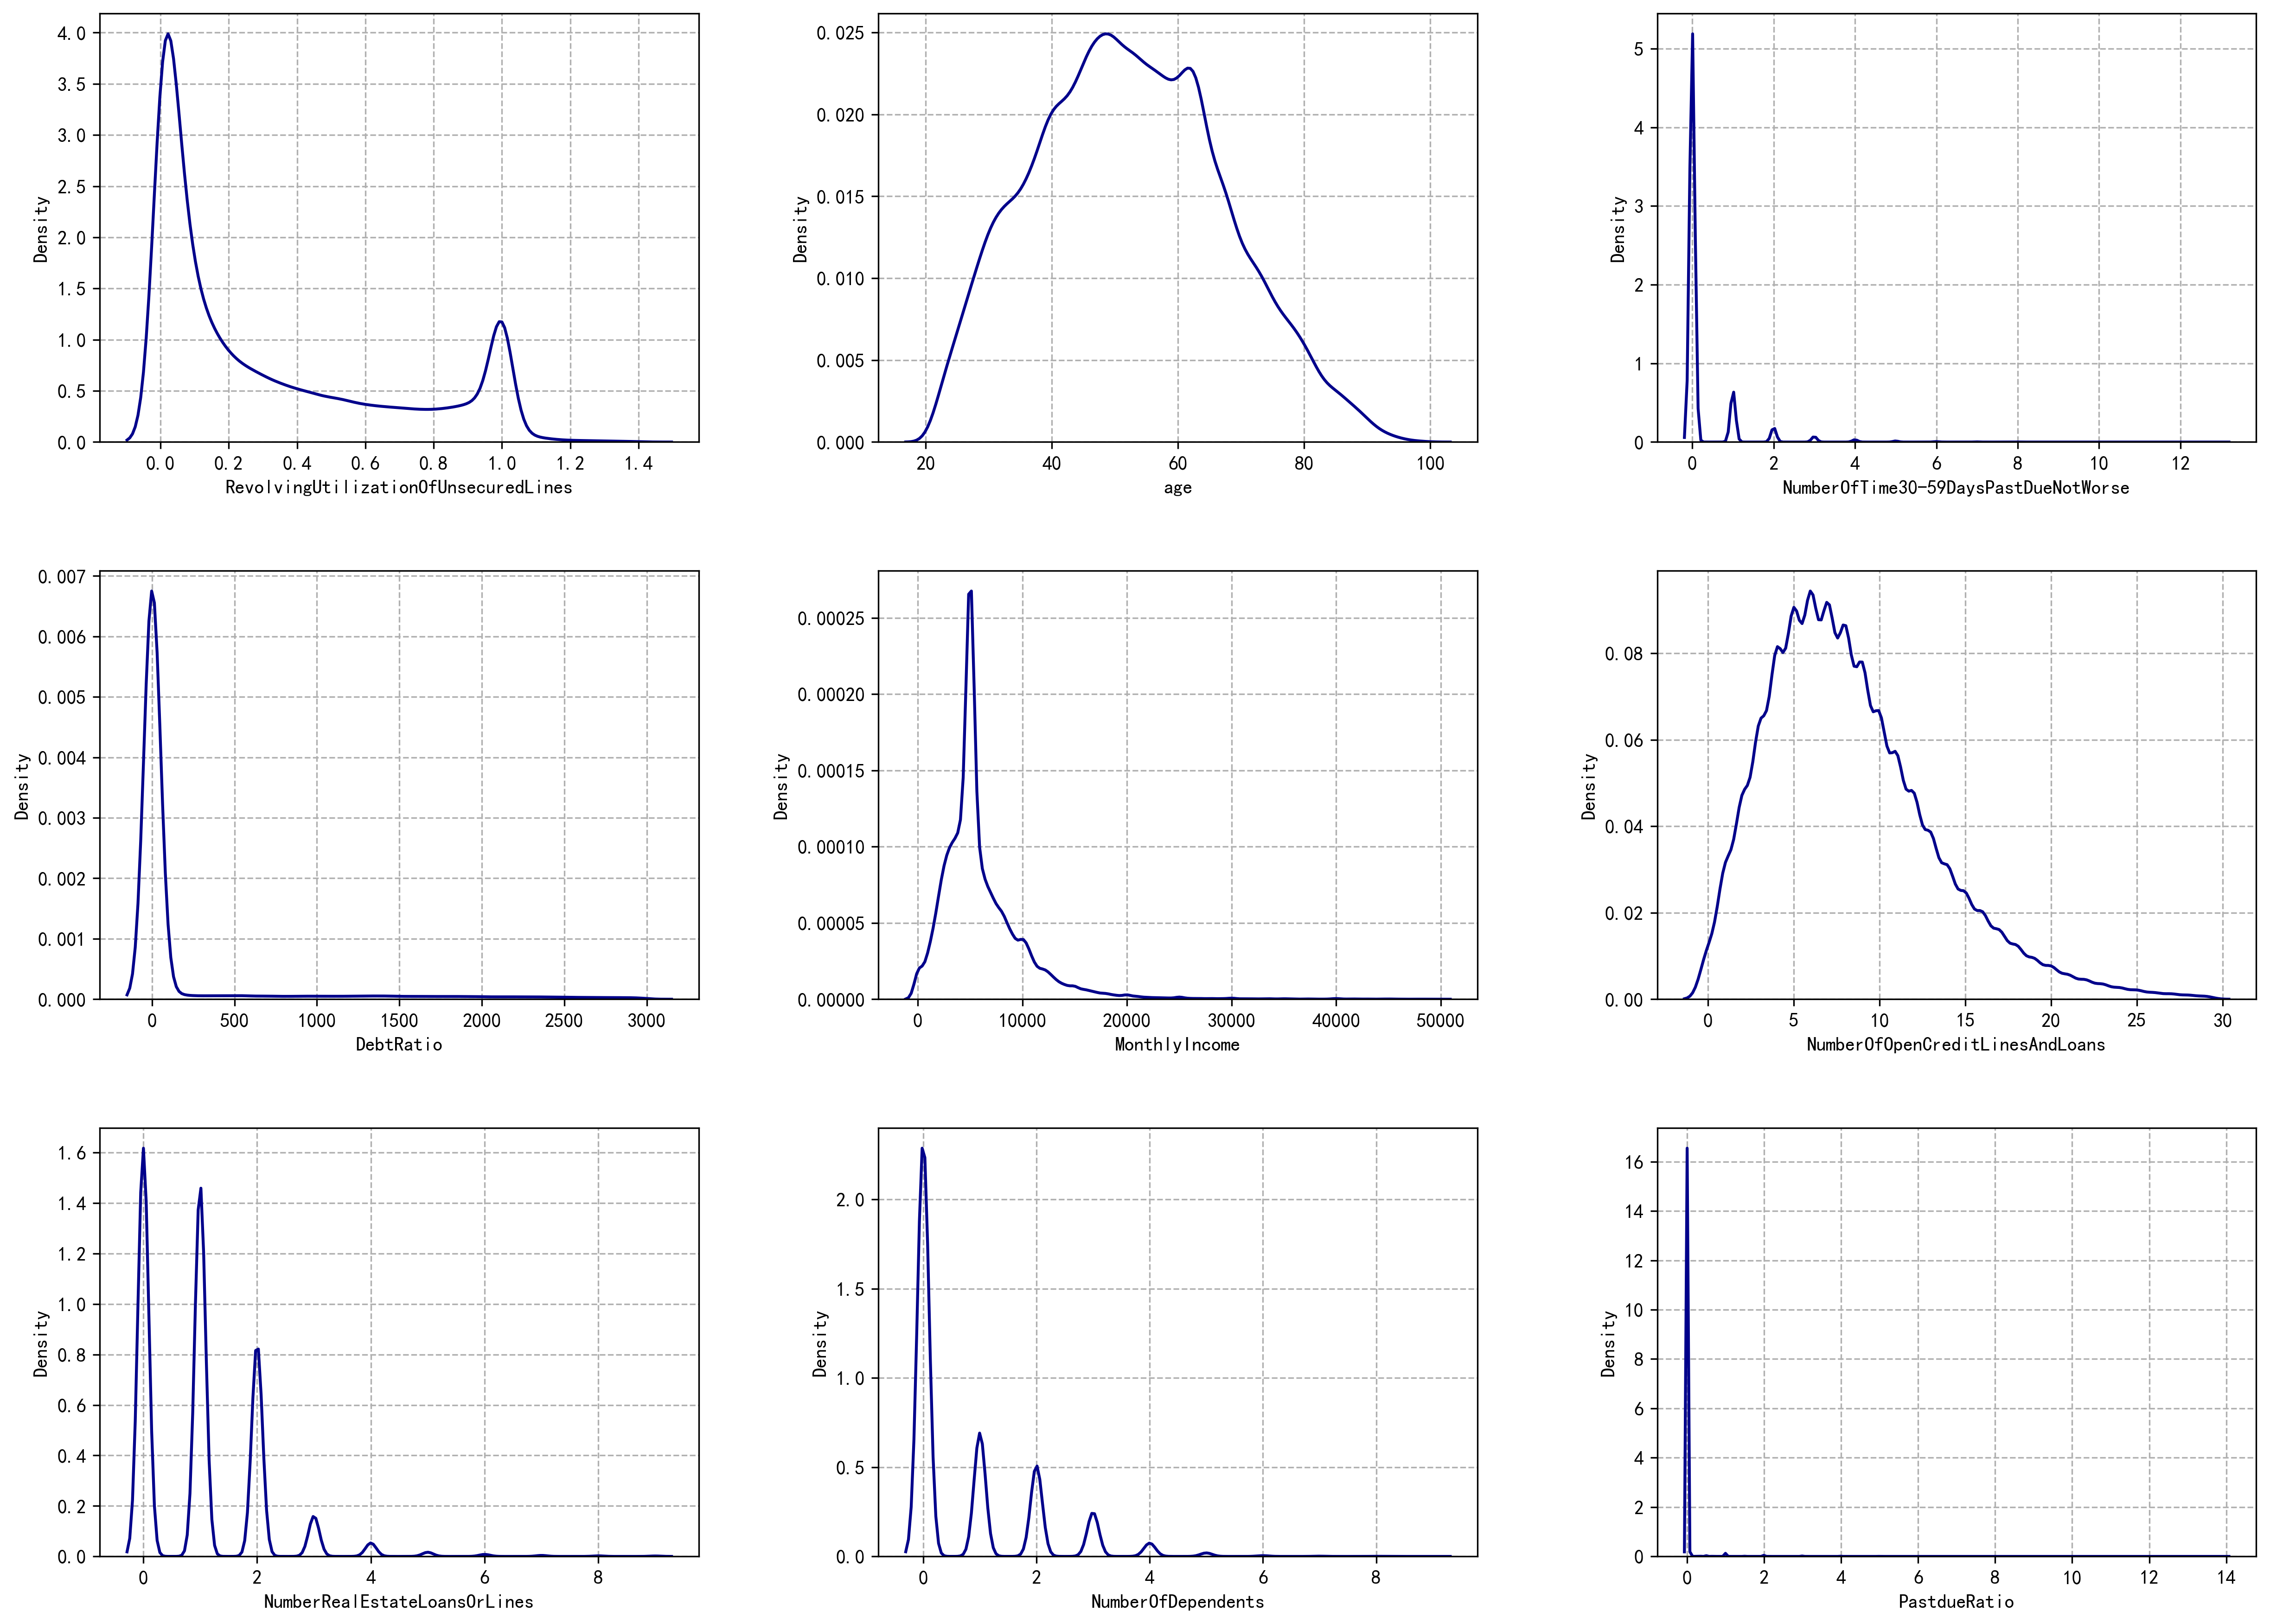

In [25]:
plt.figure(figsize=(20,20),dpi=300) 
plt.subplots_adjust(wspace =0.3, hspace =0.3) 
for n,i in enumerate(df.drop(['ID', 'SeriousDlqin2yrs'], axis=1).columns): 
     plt.subplot(4,3,n+1) 
#      plt.title('The kernel density of' + ' ' + i,fontsize=15) 
     plt.grid(linestyle='--') 
     sns.distplot(df[i],  hist  =  False,  kde_kws  =  {'color':'darkblue',  'linestyle':'-'}, norm_hist = True, label = i)
     plt.savefig('./Figures/The kernel density curves for each feature.jpg',dpi=400, bbox_inches='tight')

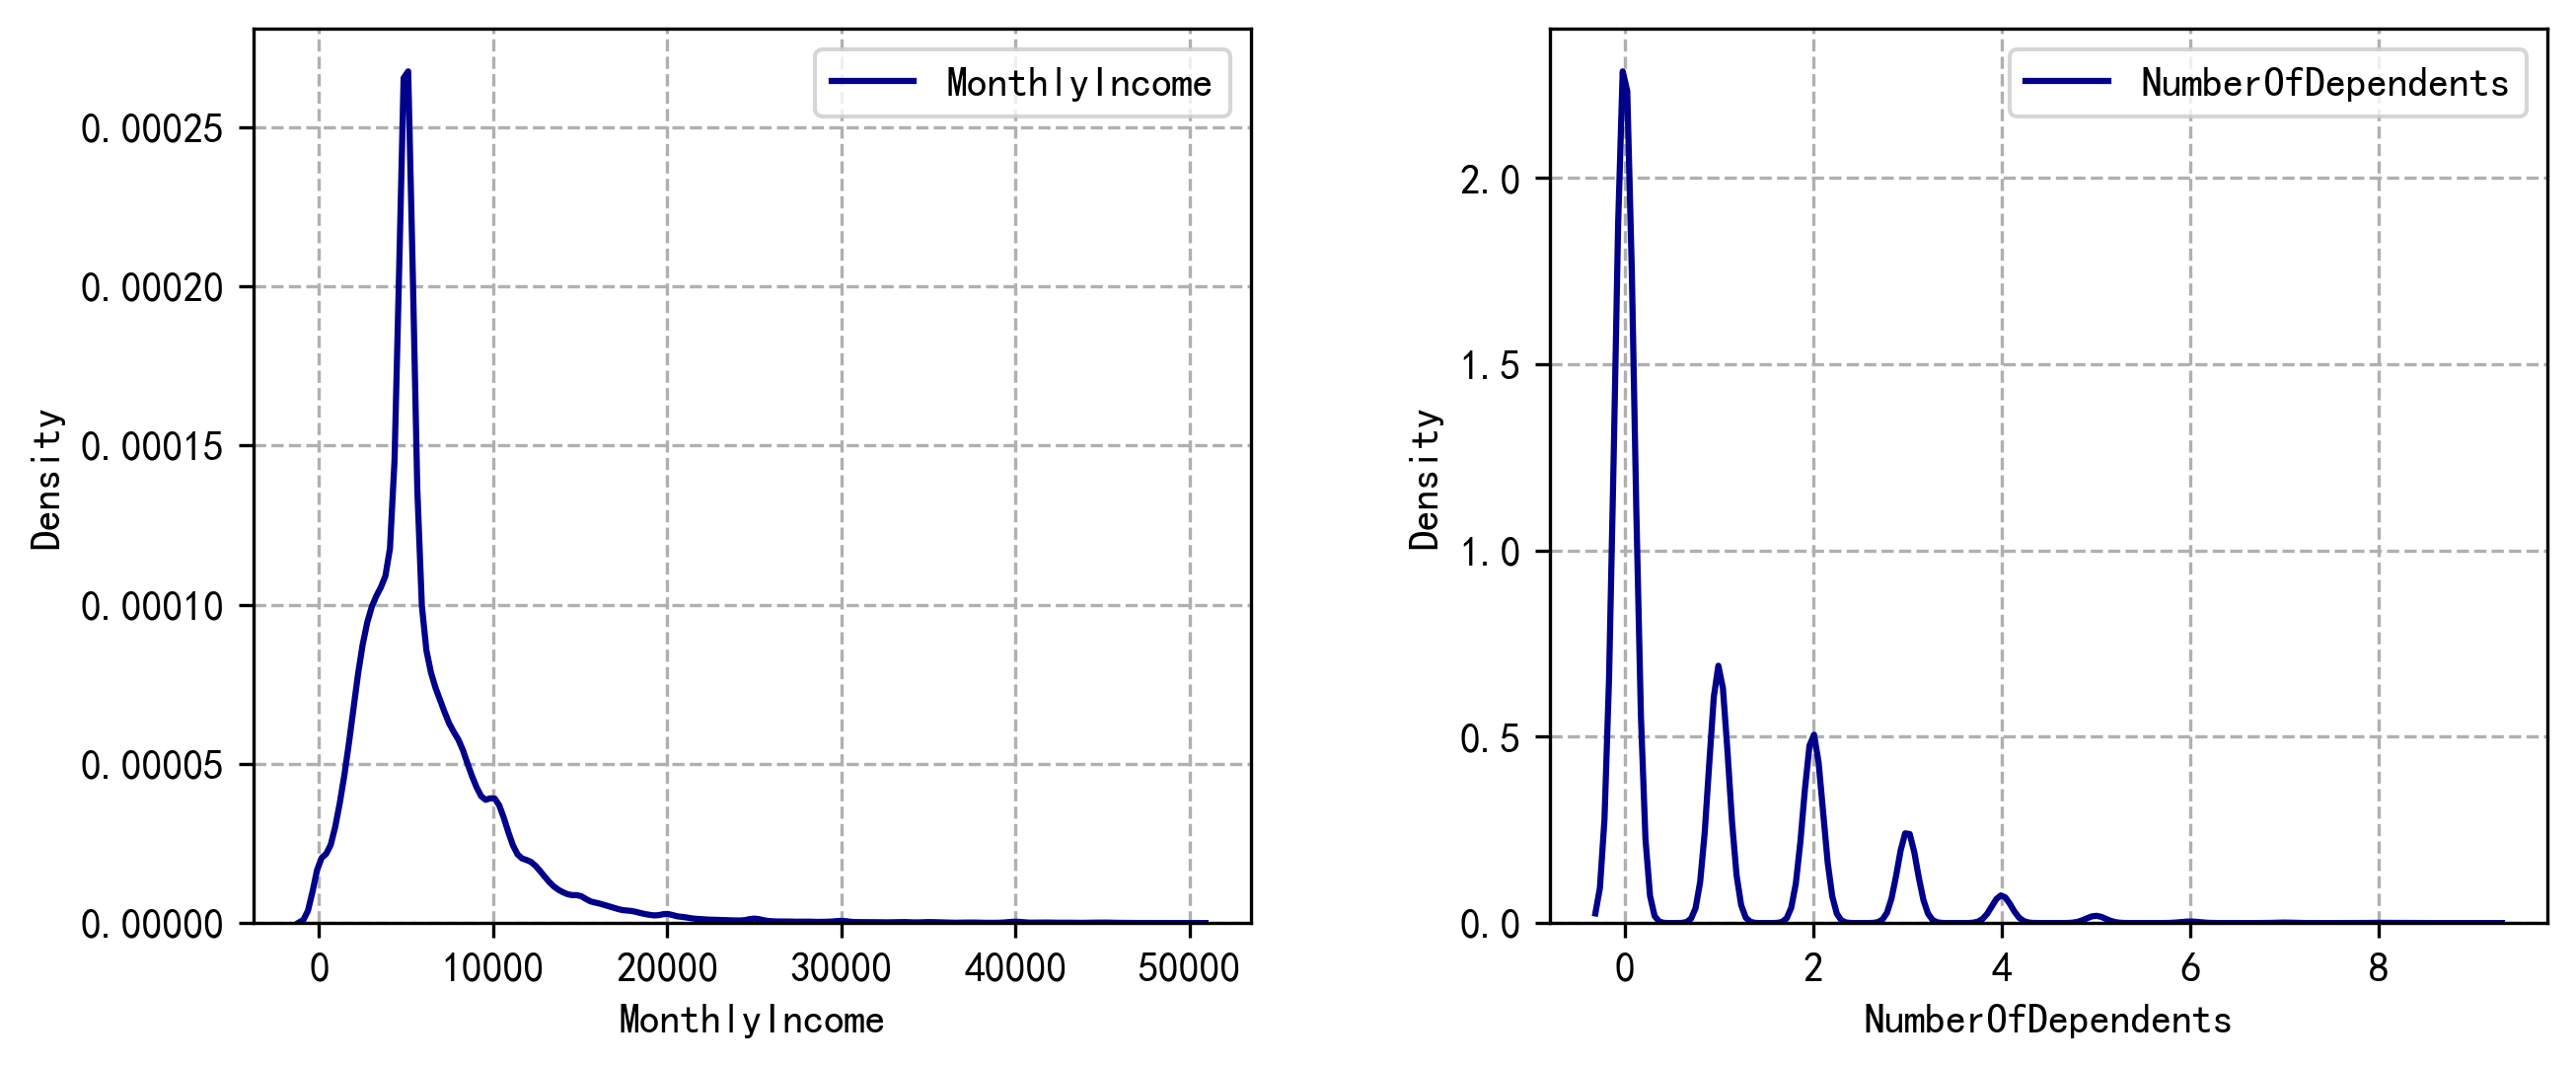

In [26]:
plt.figure(figsize=(10,4),dpi=300) 
plt.subplots_adjust(wspace =0.3, hspace =0.3) 
for n,i in enumerate(df[['MonthlyIncome', 'NumberOfDependents']].columns): 
    plt.subplot(1,2,n+1) 
    plt.grid(linestyle='--') 
    sns.distplot(df[i],  hist  =  False,  kde_kws  =  {'color':'darkblue',  'linestyle':'-'}, norm_hist = True, label = i) 
    plt.legend(loc='upper right')
    plt.savefig('./Figures/The kernel curve of missing values.jpg',dpi=400, bbox_inches='tight')

## 7. 对数变换

In [27]:
columns_org = df.drop(['ID','SeriousDlqin2yrs'], axis=1).columns 
feat_log = np.log1p(df[columns_org])

* 重新组成 DataFrame

In [28]:
feat_log_names = columns_org + "_log" 
df[feat_log_names]=pd.DataFrame( columns = feat_log_names,data = feat_log.values)  
df[feat_log_names].head() 

RevolvingUtilizationOfUnsecuredLines_log   age_log  \
0                                  0.568789  3.828641   
1                                  0.671490  3.713572   
2                                  0.505721  3.663562   
3                                  0.210107  3.433987   
4                                  0.193244  4.317488   

   NumberOfTime30-59DaysPastDueNotWorse_log  DebtRatio_log  MonthlyIncome_log  \
0                                  1.098612       0.589442           9.118335   
1                                  0.000000       0.115002           7.863651   
2                                  0.693147       0.081684           8.020599   
3                                  0.000000       0.035415           8.101981   
4                                  0.000000       0.318895           8.160804   

   NumberOfOpenCreditLinesAndLoans_log  NumberRealEstateLoansOrLines_log  \
0                             2.639057                          1.945910   
1                             1.609438                          0.000000   
2                             1.098612                          0.000000   
3                             1.791759                          0.000000   
4                             1.386294                          0.693147   

   NumberOfDependents_log  PastdueRatio_log  
0                1.098612               0.0  
1                0.693147               0.0  
2                0.000000               0.0  
3                0.000000               0.0  
4                0.693147               0.0

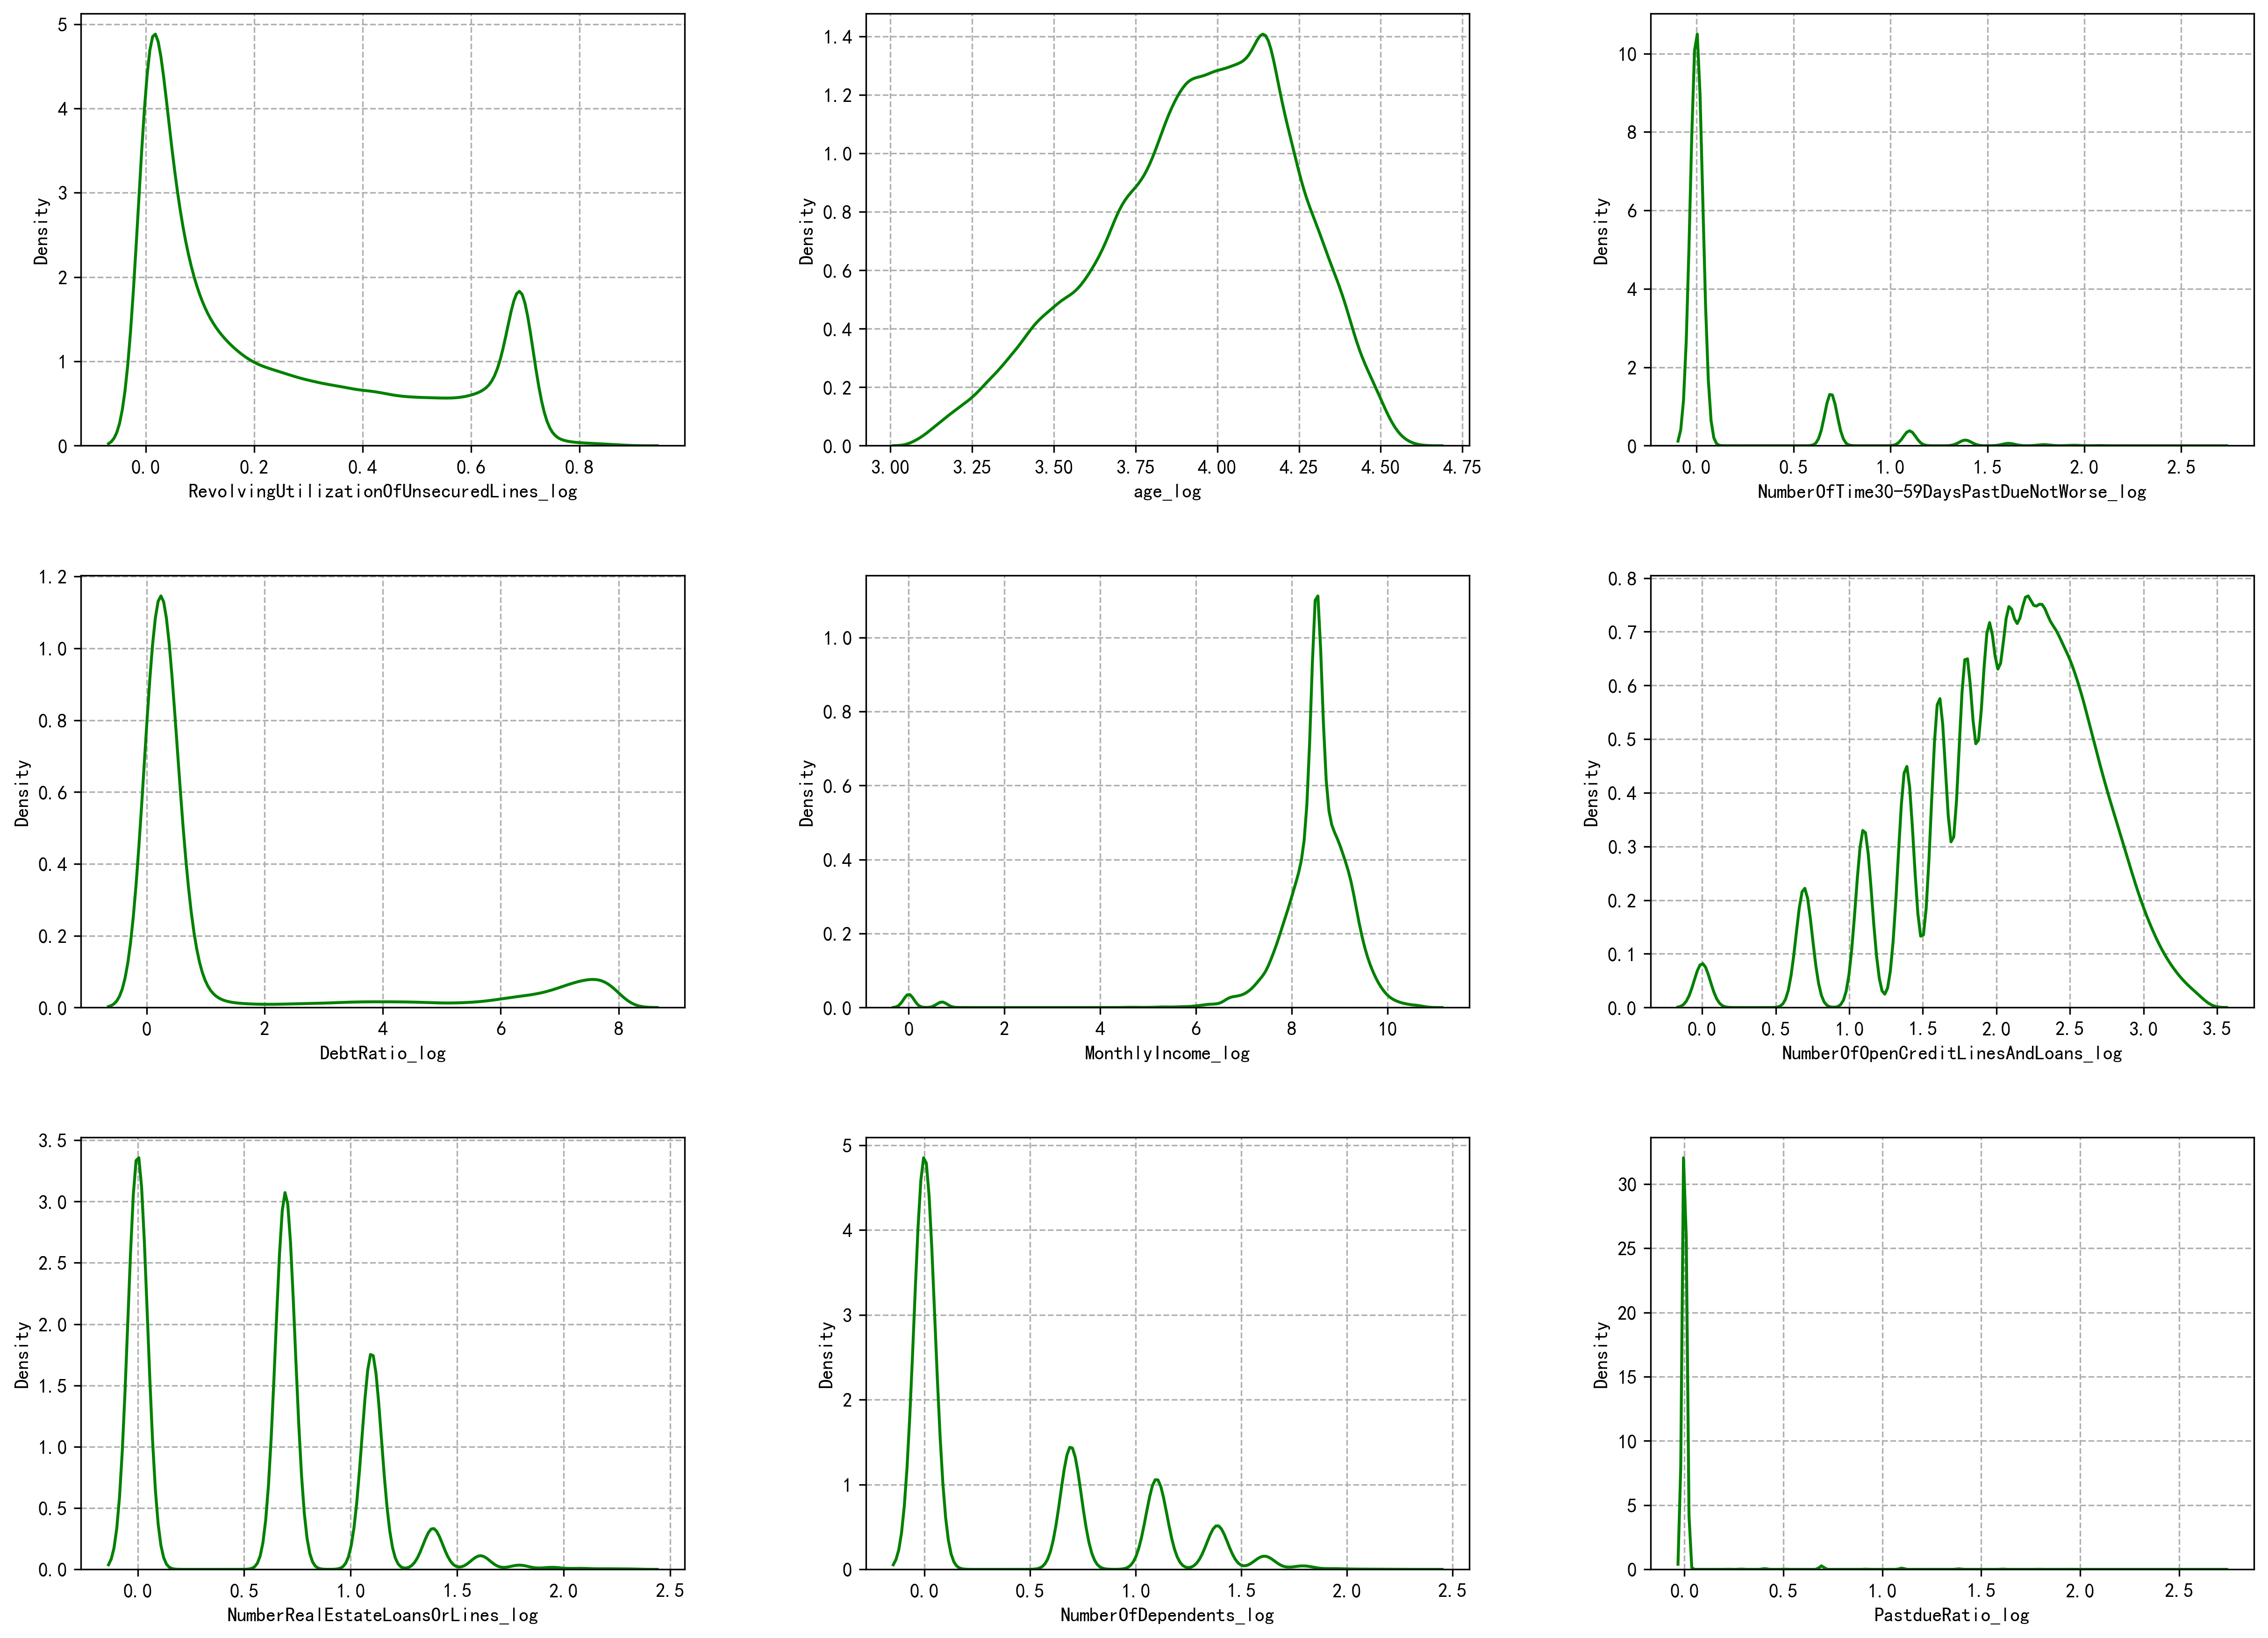

In [29]:
plt.figure(figsize=(20,20),dpi=300) 
plt.subplots_adjust(wspace =0.3, hspace =0.3) 
for n,i in enumerate(df[feat_log_names].columns): 
     plt.subplot(4,3,n+1) 
     plt.grid(linestyle='--') 
     sns.distplot(df[i],  hist  =  False,  kde_kws  =  {'color':'green',  'linestyle':'-'}, 
norm_hist = True, label = i) 


# 三.特征分析

In [30]:
df['SeriousDlqin2yrs'].value_counts()
print('Proportion of default users:{:.3f}%'.format(df['SeriousDlqin2yrs'].mean()*100))

Proportion of default users:6.503%


## 1. 绘制违约用户直方图，观察其分布

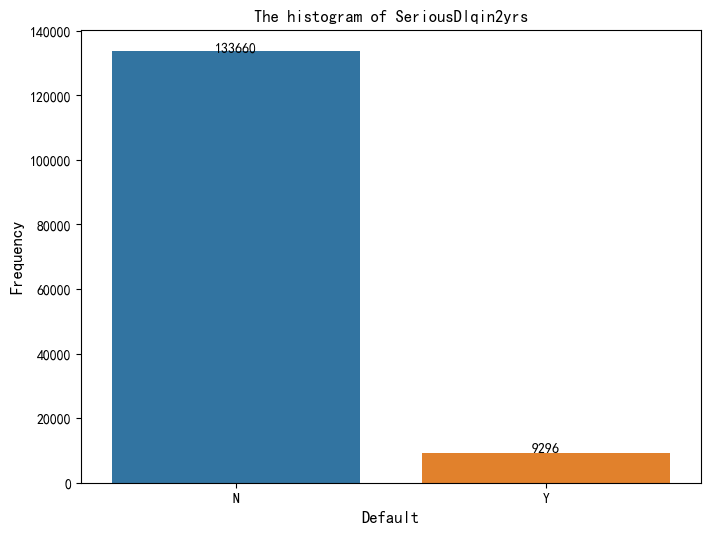

In [31]:
plt.figure(figsize=[8,6],dpi=100) 
g=sns.countplot(x='SeriousDlqin2yrs', data=df) 
plt.gca().set_xticklabels(['N', 'Y'])
plt.xlabel('Default', fontsize=12) 
plt.ylabel('Frequency', fontsize=12) 
plt.title('The histogram of SeriousDlqin2yrs')

for x,y in enumerate(df['SeriousDlqin2yrs'].value_counts()): 
     plt.text(x,y + 0.1,'%s' %round(y,1),ha='center')   
plt.show() 


* 违约用户比例饼图

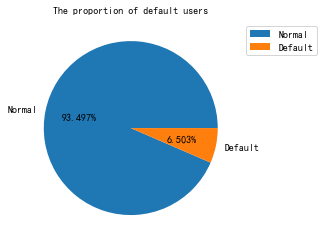

In [32]:
# plt.rcParams['font.sans-serif']=['Microsoft YaHei']
labels = ['Normal','Default']

# 为确保绘制的饼图为圆形，需执行如下代码
plt.axes(aspect = 'equal')
# 统计违约用户和正常用户数量
counts = df.SeriousDlqin2yrs.value_counts()

# 绘制饼图
plt.pie(x = counts, # 绘图数据
        labels=pd.Series(counts.index).map({1:'Default',0:'Normal'}), # 添加文字标签
        autopct='%.3f%%' # 设置百分比的格式，这里保留一位小数
       )
plt.legend(labels,bbox_to_anchor=(1, 1), loc='best', borderaxespad=0.7)
plt.title('The proportion of default users',fontsize = 10)
# 显示图形
plt.show()

* 二合一图

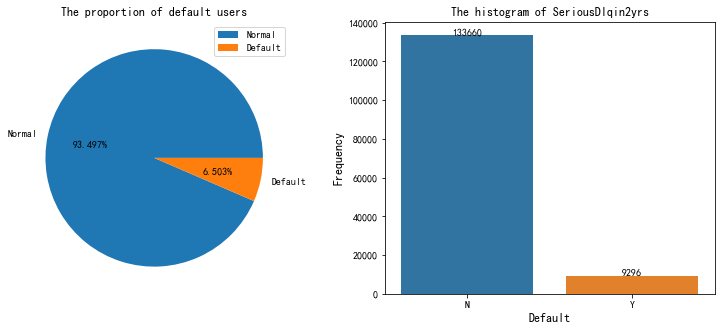

In [33]:
# 饼图
plt.figure(figsize=(13, 5))
plt.subplot(121)
labels = ['Normal','Default']
# 统计违约用户和正常用户数量
counts = df.SeriousDlqin2yrs.value_counts()

# 绘制饼图
plt.pie(x = counts, # 绘图数据
        labels=pd.Series(counts.index).map({1:'Default',0:'Normal'}), # 添加文字标签
        autopct='%.3f%%' # 设置百分比的格式，这里保留一位小数
       )
plt.legend(labels,bbox_to_anchor=(1, 1), loc= 'upper right', borderaxespad=0.5)
plt.title('The proportion of default users')



# 直方图
plt.subplot(122)
g=sns.countplot(x='SeriousDlqin2yrs', data=df) 
plt.gca().set_xticklabels(['N', 'Y'])
plt.xlabel('Default', fontsize=12) 
plt.ylabel('Frequency', fontsize=12) 
plt.title('The histogram of SeriousDlqin2yrs')

for x,y in enumerate(df['SeriousDlqin2yrs'].value_counts()): 
     plt.text(x,y + 0.1,'%s' %round(y,1),ha='center')   

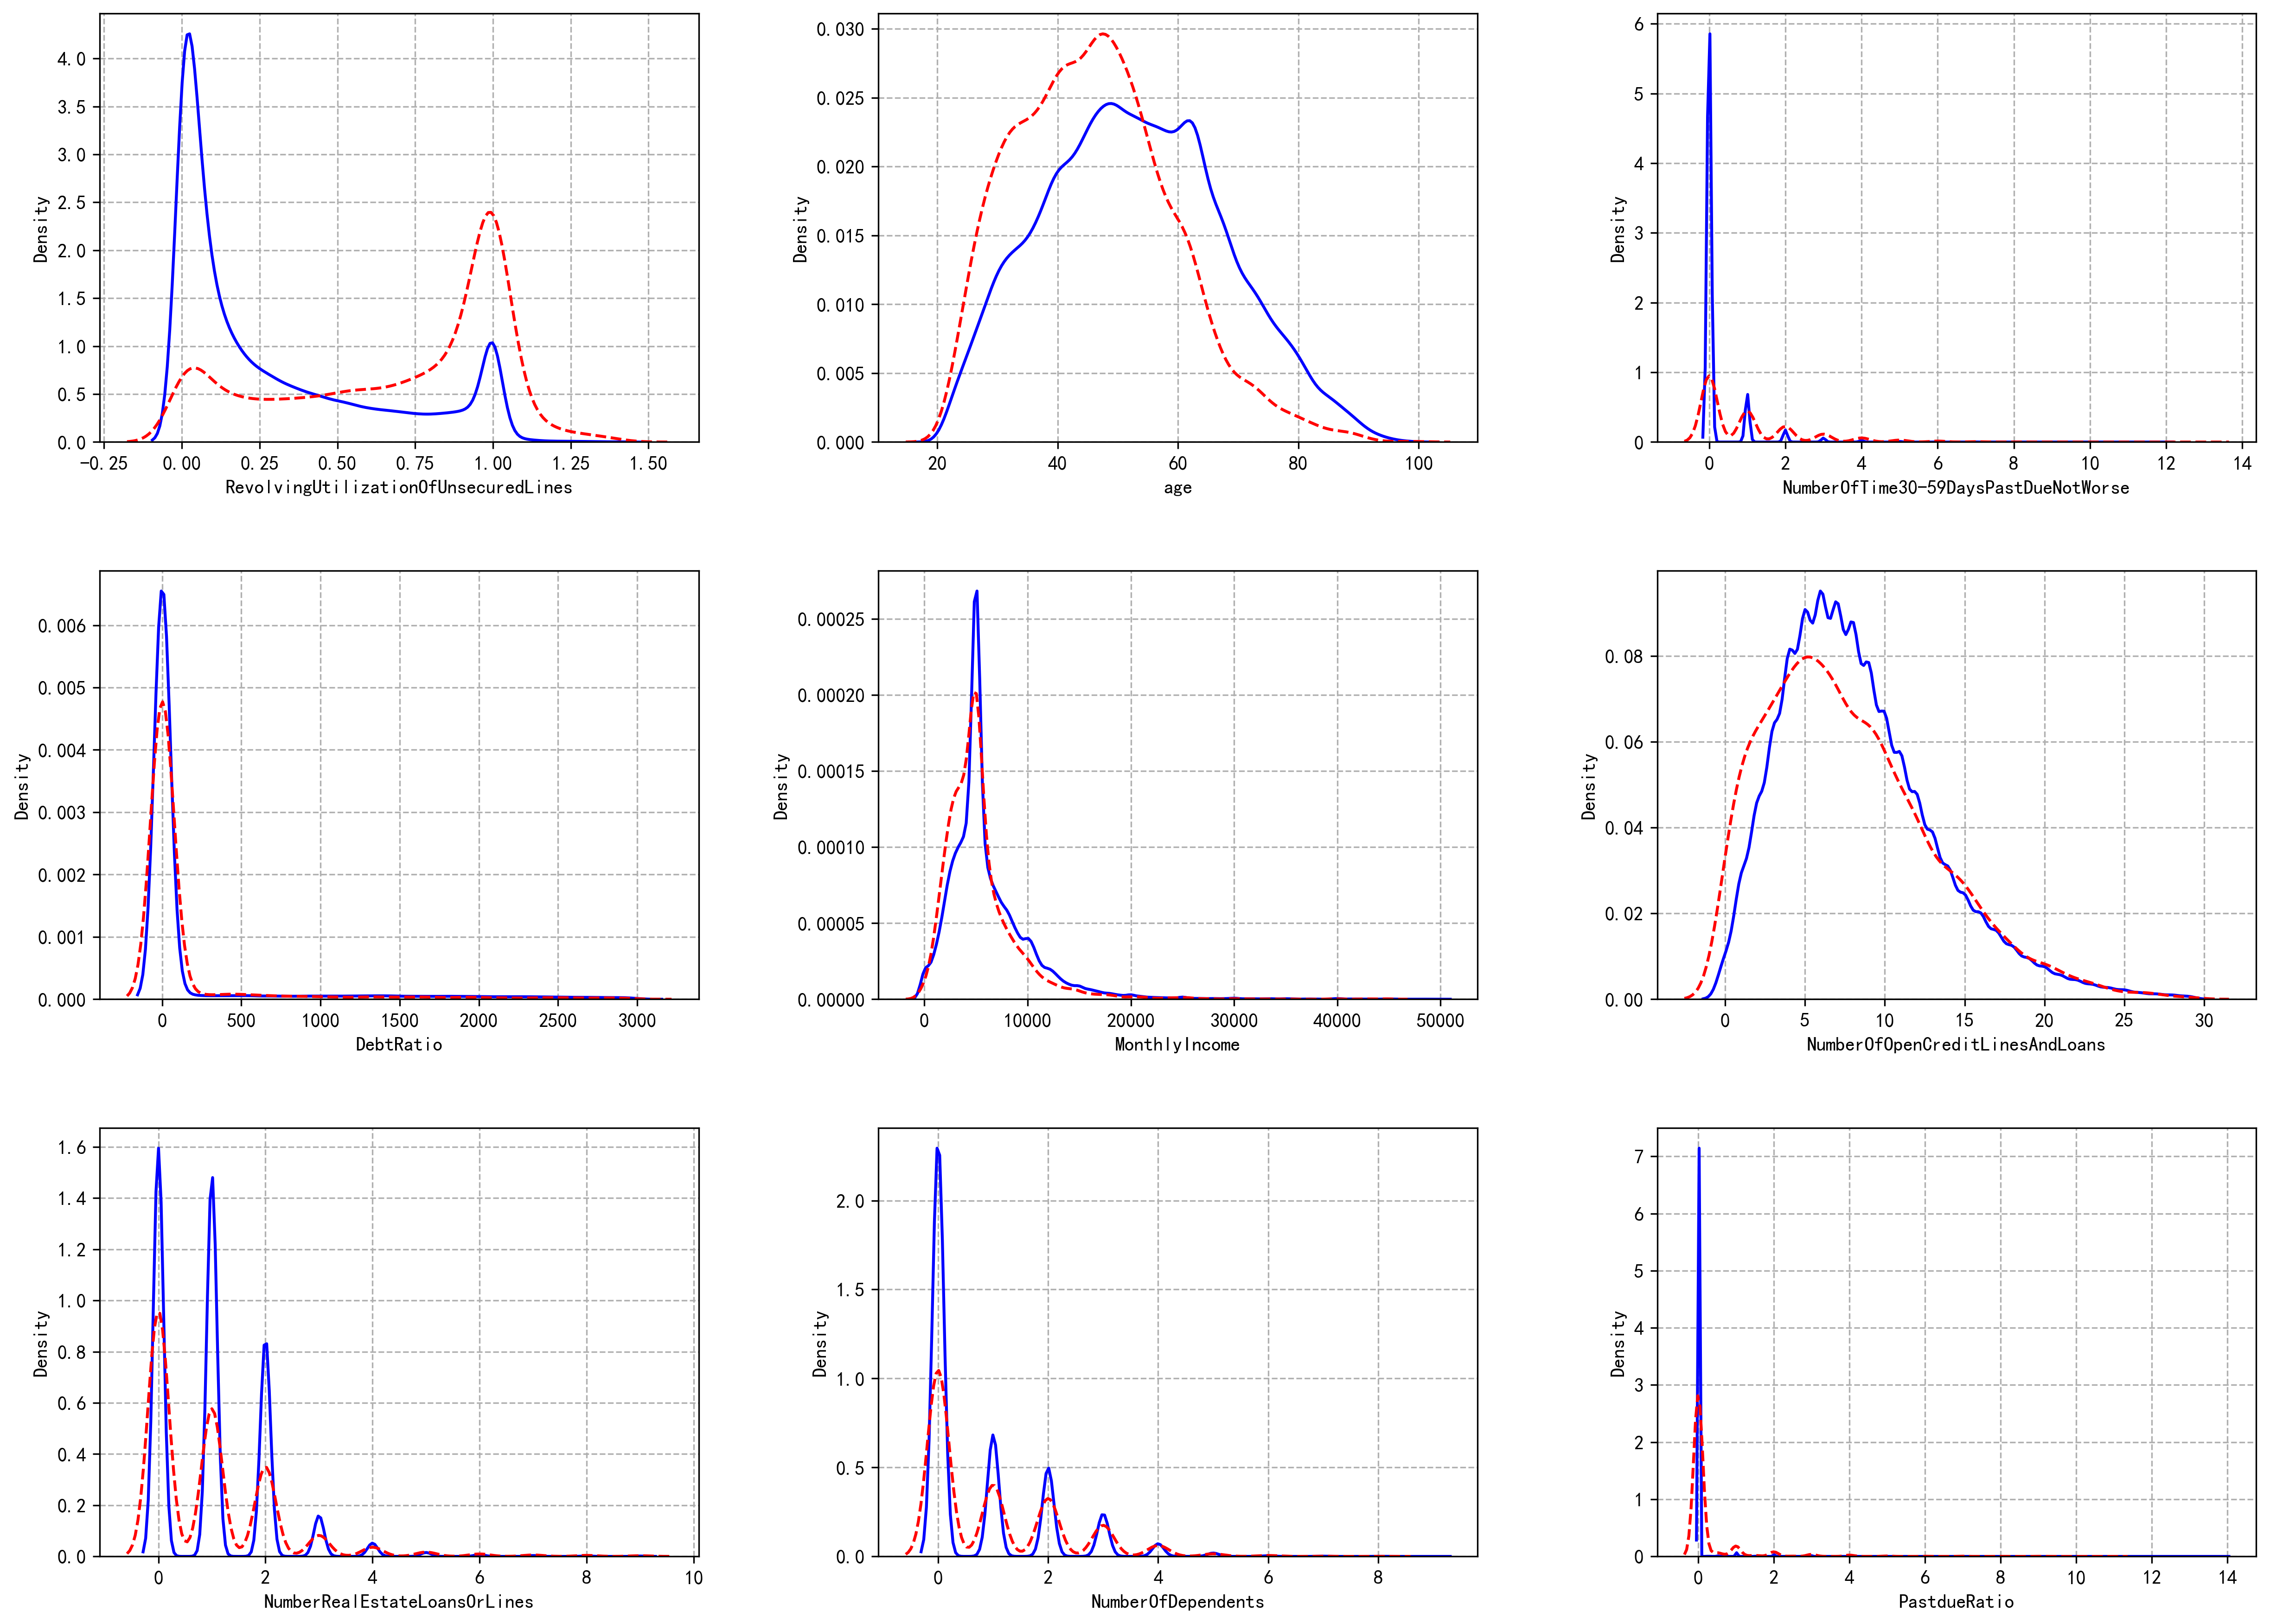

In [34]:
plt.figure(figsize=(20,20),dpi=300) 
plt.subplots_adjust(wspace =0.3, hspace =0.3) 

for  n,i  in  enumerate(df.drop(['ID','SeriousDlqin2yrs'] + feat_log_names.tolist()  , axis=1).columns): 
    plt.subplot(4,3,n+1) 
    plt.grid(linestyle='--')
    sns.distplot(df[i][df['SeriousDlqin2yrs']==0], hist = False, kde_kws = { 'color':'blue', 'linestyle':'-'}, norm_hist = True, label = 'Normal' ) 
    sns.distplot(df[i][df['SeriousDlqin2yrs']==1], hist = False, kde_kws = { 'color':'red', 'linestyle':'--'}, norm_hist = True, label = 'Default' )

* 月收入12k 以下，违约比较明显

In [35]:
# df['MonthlyIncome_Binning'] = np.where(df['MonthlyIncome']<=12000,1,0) 

* 年龄55以下，违约比较明显

In [36]:
# df['age_Binning'] = np.where(df['age']<55,1,0) 

* 信贷数量4 以下，违约比较明显

In [37]:
# df['NumberOfOpenCreditLinesAndLoans_Binning'] = np.where(df['NumberOfOpenCreditLinesAndLoans']<4,1,0) 

* 可用信贷额度比例大于0.45时，违约比较明显

In [38]:
# df['RevolvingUtilizationOfUnsecuredLines_Binning'] = np.where(df['RevolvingUtilizationOfUnsecuredLines']>0.45,1,0) 

## 2. 分箱 + 虚拟编码

### 2.1 用户基本属性信息

#### 2.1.1 家属数量

In [39]:
df['NumberOfDependents_Binning'] = pd.cut(df['NumberOfDependents'], bins=[-1, 0, 1, 2, 3, 4, 9], 
                            precision=0)# labels=[1,2,3,4,5,6,7] 

print('The classes of features reduced from', len(df['NumberOfDependents'].unique()),
        'to', len(df['NumberOfDependents_Binning'].values.unique()))

pd.crosstab(df['NumberOfDependents_Binning'],df['SeriousDlqin2yrs'])

a = pd.crosstab(df['NumberOfDependents_Binning'],df['SeriousDlqin2yrs'])
a

The classes of features reduced from 10 to 6


SeriousDlqin2yrs                0     1
NumberOfDependents_Binning             
(-1, 0]                     81066  4793
(0, 1]                      23681  1837
(1, 2]                      17288  1490
(2, 3]                       8304   800
(3, 4]                       2468   280
(4, 9]                        853    96

In [40]:
a.columns = ['normal','default']
a

normal  default
NumberOfDependents_Binning                 
(-1, 0]                      81066     4793
(0, 1]                       23681     1837
(1, 2]                       17288     1490
(2, 3]                        8304      800
(3, 4]                        2468      280
(4, 9]                         853       96

In [41]:
a.eval('sum = normal + default',inplace = True)
a.eval('percentage = default / (normal + default)',inplace = True)
a

normal  default    sum  percentage
NumberOfDependents_Binning                                    
(-1, 0]                      81066     4793  85859    0.055824
(0, 1]                       23681     1837  25518    0.071988
(1, 2]                       17288     1490  18778    0.079348
(2, 3]                        8304      800   9104    0.087873
(3, 4]                        2468      280   2748    0.101892
(4, 9]                         853       96    949    0.101159

In [42]:
# 定义lamda函数,将值转为百分数的形式
f1 = lambda x:'%.2f%%' % (x*100)

a['percentage'] = a['percentage'].apply(f1)
a

normal  default    sum percentage
NumberOfDependents_Binning                                   
(-1, 0]                      81066     4793  85859      5.58%
(0, 1]                       23681     1837  25518      7.20%
(1, 2]                       17288     1490  18778      7.93%
(2, 3]                        8304      800   9104      8.79%
(3, 4]                        2468      280   2748     10.19%
(4, 9]                         853       96    949     10.12%

* 家属数量直方图

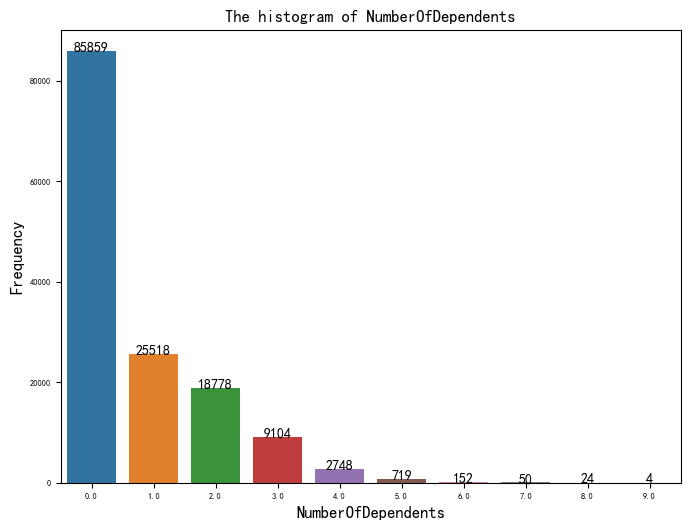

In [43]:
plt.figure(figsize=[8,6],dpi=100) 
g=sns.countplot(x=df['NumberOfDependents'],data=df) 
plt.xlabel('NumberOfDependents', fontsize=12) 
plt.ylabel('Frequency', fontsize=12) 
plt.tick_params(labelsize=6)
plt.title('The histogram of NumberOfDependents')

for x,y in enumerate(df['NumberOfDependents'].value_counts().sort_index()): 
     plt.text(x,y + 0.1,'%s' %round(y,1),ha='center')   
plt.show() 

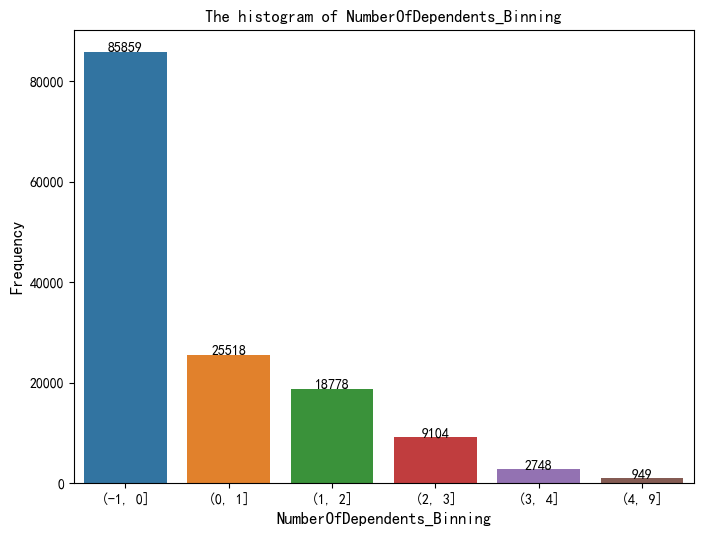

In [44]:
plt.figure(figsize=[8,6],dpi=100) 
g=sns.countplot(x=df['NumberOfDependents_Binning'],data=df['NumberOfDependents_Binning']) 
plt.xlabel('NumberOfDependents_Binning', fontsize=12) 
plt.ylabel('Frequency', fontsize=12) 
plt.title('The histogram of NumberOfDependents_Binning')

for x,y in enumerate(df['NumberOfDependents_Binning'].value_counts().sort_index()): 
     plt.text(x,y + 0.1,'%s' %round(y,1),ha='center')   
plt.show() 

* 家属数量核密度图

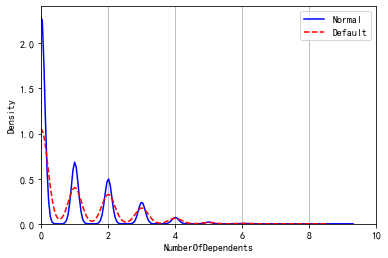

In [45]:
plt.grid(axis='x',linestyle='-')
sns.distplot(df['NumberOfDependents'][df['SeriousDlqin2yrs']==0], hist = False, kde_kws = { 'color':'blue', 'linestyle':'-'}, norm_hist = True, label = 'Normal' ) 
sns.distplot(df['NumberOfDependents'][df['SeriousDlqin2yrs']==1], hist = False, kde_kws = { 'color':'red', 'linestyle':'--'}, norm_hist = True, label = 'Default' )
plt.legend(loc='upper right')
plt.xlim(0,10)
plt.savefig('./Figures/The NumberOfDependents kernel curve of default and normal users.jpg',dpi=400, bbox_inches='tight')

#### 2.1.2 年龄

In [46]:
df['age_Binning'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 55, 65, 99], 
                            precision=0)

print('The classes of features reduced from', len(df['age'].unique()),
        'to', len(df['age_Binning'].values.unique()))

b = pd.crosstab(df['age_Binning'],df['SeriousDlqin2yrs'])
b

The classes of features reduced from 79 to 6


SeriousDlqin2yrs      0     1
age_Binning                  
(18, 25]           2615   295
(25, 35]          16038  1919
(35, 45]          25995  2431
(45, 55]          32039  2584
(55, 65]          29949  1416
(65, 99]          27024   651

In [47]:
b.columns = ['normal','default']
b

normal  default
age_Binning                 
(18, 25]       2615      295
(25, 35]      16038     1919
(35, 45]      25995     2431
(45, 55]      32039     2584
(55, 65]      29949     1416
(65, 99]      27024      651

* 违约比例

In [48]:
b.eval('sum = normal + default',inplace = True)
b.eval('percentage = default / (normal + default)',inplace = True)
b

normal  default    sum  percentage
age_Binning                                    
(18, 25]       2615      295   2910    0.101375
(25, 35]      16038     1919  17957    0.106866
(35, 45]      25995     2431  28426    0.085520
(45, 55]      32039     2584  34623    0.074632
(55, 65]      29949     1416  31365    0.045146
(65, 99]      27024      651  27675    0.023523

In [49]:
# 定义lamda函数,将值转为百分数的形式
f1 = lambda x:'%.2f%%' % (x*100)

b['percentage'] = b['percentage'].apply(f1)
b

normal  default    sum percentage
age_Binning                                   
(18, 25]       2615      295   2910     10.14%
(25, 35]      16038     1919  17957     10.69%
(35, 45]      25995     2431  28426      8.55%
(45, 55]      32039     2584  34623      7.46%
(55, 65]      29949     1416  31365      4.51%
(65, 99]      27024      651  27675      2.35%

* 年龄直方图

In [50]:
df['age_Binning']

0         (35, 45]
1         (35, 45]
2         (35, 45]
3         (25, 35]
4         (65, 99]
            ...   
142951    (45, 55]
142952    (65, 99]
142953    (35, 45]
142954    (25, 35]
142955    (55, 65]
Name: age_Binning, Length: 142956, dtype: category
Categories (6, interval[int64, right]): [(18, 25] < (25, 35] < (35, 45] < (45, 55] < (55, 65] < (65, 99]]

In [51]:
b.index

CategoricalIndex([(18, 25], (25, 35], (35, 45], (45, 55], (55, 65], (65, 99]], categories=[(18, 25], (25, 35], (35, 45], (45, 55], (55, 65], (65, 99]], ordered=True, dtype='category', name='age_Binning')

Text(0.5, 1.0, 'The histogram of age')

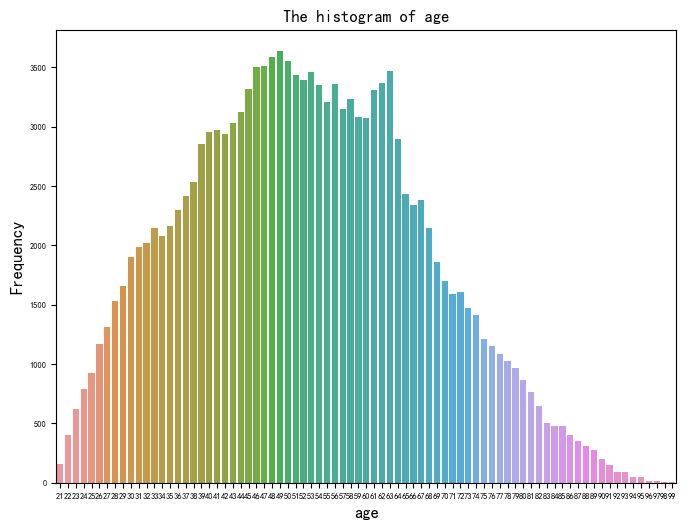

In [52]:
plt.figure(figsize=[8,6],dpi=100) 
g=sns.countplot(x=df['age'],data=df) 
plt.xlabel('age', fontsize=12) 
plt.ylabel('Frequency', fontsize=12) 
plt.tick_params(labelsize=6)
plt.title('The histogram of age')

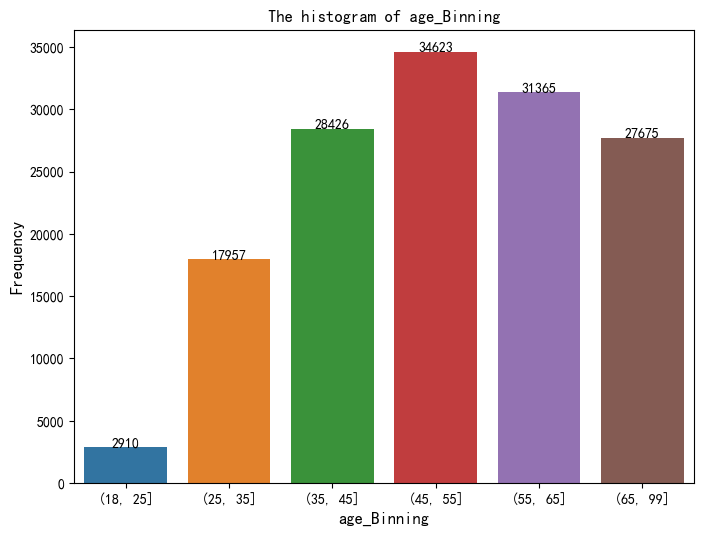

In [53]:
plt.figure(figsize=[8,6],dpi=100) 
g=sns.countplot(x=df['age_Binning'],data=df['age_Binning']) 
plt.xlabel('age_Binning', fontsize=12) 
plt.ylabel('Frequency', fontsize=12) 
plt.title('The histogram of age_Binning')

for x,y in enumerate(df['age_Binning'].value_counts().sort_index()): 
     plt.text(x,y + 0.1,'%s' %round(y,1),ha='center')   
plt.show() 

* 年龄核密度图

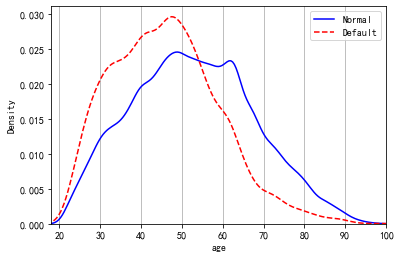

In [54]:
plt.grid(axis='x',linestyle='-')
sns.distplot(df['age'][df['SeriousDlqin2yrs']==0], hist = False, kde_kws = { 'color':'blue', 'linestyle':'-'}, norm_hist = True, label = 'Normal' ) 
sns.distplot(df['age'][df['SeriousDlqin2yrs']==1], hist = False, kde_kws = { 'color':'red', 'linestyle':'--'}, norm_hist = True, label = 'Default' )
plt.legend(loc='upper right')
plt.xlim(18,100)
plt.savefig('./Figures/The age kernel curve of default and normal users.jpg',dpi=400, bbox_inches='tight')

#### 2.1.3 月收入

In [55]:
df['MonthlyIncome_Binning'] = pd.cut(df['MonthlyIncome'], bins=[-10000, 12000,49750], 
                            precision=0)

print('The classes of features reduced from', len(df['MonthlyIncome'].unique()),
        'to', len(df['MonthlyIncome_Binning'].values.unique()))

c = pd.crosstab(df['MonthlyIncome_Binning'],df['SeriousDlqin2yrs'])
c

The classes of features reduced from 13307 to 2


SeriousDlqin2yrs            0     1
MonthlyIncome_Binning              
(-10000, 12000]        123886  8855
(12000, 49750]           9774   441

In [56]:
c.columns = ['normal','default']
c

normal  default
MonthlyIncome_Binning                 
(-10000, 12000]        123886     8855
(12000, 49750]           9774      441

In [57]:
c.eval('sum = normal + default',inplace = True)
c

normal  default     sum
MonthlyIncome_Binning                         
(-10000, 12000]        123886     8855  132741
(12000, 49750]           9774      441   10215

In [58]:
c.index = ['more than 12k','less than 12k']
c

normal  default     sum
more than 12k  123886     8855  132741
less than 12k    9774      441   10215

In [59]:
c.index

Index(['more than 12k', 'less than 12k'], dtype='object')

* 月收入直方图

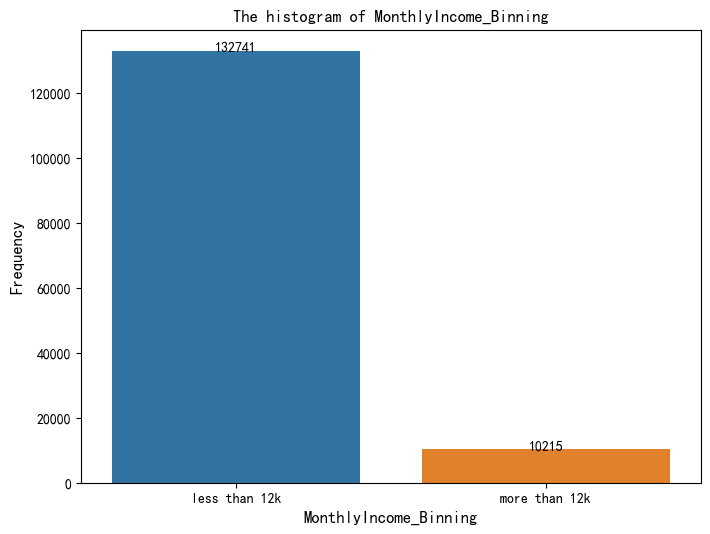

In [60]:
plt.figure(figsize=[8,6],dpi=100) 
g=sns.countplot(x=df['MonthlyIncome_Binning'],data=df['MonthlyIncome_Binning']) 
plt.gca().set_xticklabels(['less than 12k', 'more than 12k'])
plt.xlabel('MonthlyIncome_Binning', fontsize=12) 
plt.ylabel('Frequency', fontsize=12) 
plt.title('The histogram of MonthlyIncome_Binning')

for x,y in enumerate(df['MonthlyIncome_Binning'].value_counts().sort_index()): 
     plt.text(x,y + 0.1,'%s' %round(y,1),ha='center')   
plt.show() 

* 月收入核密度图

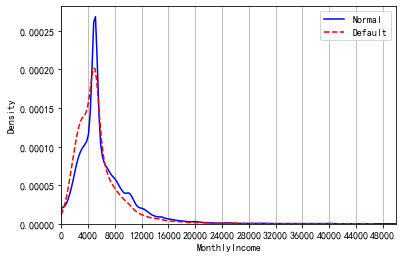

In [61]:
from matplotlib.pyplot import MultipleLocator #导入此类，设置坐标轴间隔

plt.grid(axis='x',linestyle='-')
sns.distplot(df['MonthlyIncome'][df['SeriousDlqin2yrs']==0], hist = False, kde_kws = { 'color':'blue', 'linestyle':'-'}, norm_hist = True, label = 'Normal' ) 
sns.distplot(df['MonthlyIncome'][df['SeriousDlqin2yrs']==1], hist = False, kde_kws = { 'color':'red', 'linestyle':'--'}, norm_hist = True, label = 'Default' )
plt.legend(loc='upper right')
plt.xlim(0,50000)

# 修改x轴刻度间距为4000
x_major_locator=MultipleLocator(4000)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)

plt.savefig('./Figures/The MonthlyIncome kernel curve of default and normal users.jpg',dpi=400, bbox_inches='tight')

### 2.2 用户信贷相关信息

#### 2.2.1 用户逾期30-59天的笔数

In [62]:
df['NumberOfTime30-59DaysPastDueNotWorse_Binning'] = pd.cut(df['NumberOfTime30-59DaysPastDueNotWorse'], bins=[-1, 0, 1, 2, 3, 13], 
                            precision=0)# labels=[1,2,3,4,5,6,7] 

print('The classes of features reduced from', len(df['NumberOfTime30-59DaysPastDueNotWorse'].unique()),
        'to', len(df['NumberOfTime30-59DaysPastDueNotWorse_Binning'].values.unique()))

pd.crosstab(df['NumberOfTime30-59DaysPastDueNotWorse_Binning'],df['SeriousDlqin2yrs'])

d = pd.crosstab(df['NumberOfTime30-59DaysPastDueNotWorse_Binning'],df['SeriousDlqin2yrs'])
d

The classes of features reduced from 14 to 5


SeriousDlqin2yrs                                   0     1
NumberOfTime30-59DaysPastDueNotWorse_Binning              
(-1, 0]                                       115796  4792
(0, 1]                                         12930  2251
(1, 2]                                          3198  1131
(2, 3]                                          1063   574
(3, 13]                                          673   548

In [63]:
d.columns = ['normal','default']
d

normal  default
NumberOfTime30-59DaysPastDueNotWorse_Binning                 
(-1, 0]                                       115796     4792
(0, 1]                                         12930     2251
(1, 2]                                          3198     1131
(2, 3]                                          1063      574
(3, 13]                                          673      548

* 违约比例

In [64]:
d.eval('sum = normal + default',inplace = True)
d.eval('percentage = default / (normal + default)',inplace = True)
d

normal  default     sum  \
NumberOfTime30-59DaysPastDueNotWorse_Binning                            
(-1, 0]                                       115796     4792  120588   
(0, 1]                                         12930     2251   15181   
(1, 2]                                          3198     1131    4329   
(2, 3]                                          1063      574    1637   
(3, 13]                                          673      548    1221   

                                              percentage  
NumberOfTime30-59DaysPastDueNotWorse_Binning              
(-1, 0]                                         0.039739  
(0, 1]                                          0.148277  
(1, 2]                                          0.261261  
(2, 3]                                          0.350641  
(3, 13]                                         0.448812

In [65]:
# 定义lamda函数,将值转为百分数的形式
f1 = lambda x:'%.2f%%' % (x*100)

d['percentage'] = d['percentage'].apply(f1)
d

normal  default     sum  \
NumberOfTime30-59DaysPastDueNotWorse_Binning                            
(-1, 0]                                       115796     4792  120588   
(0, 1]                                         12930     2251   15181   
(1, 2]                                          3198     1131    4329   
(2, 3]                                          1063      574    1637   
(3, 13]                                          673      548    1221   

                                             percentage  
NumberOfTime30-59DaysPastDueNotWorse_Binning             
(-1, 0]                                           3.97%  
(0, 1]                                           14.83%  
(1, 2]                                           26.13%  
(2, 3]                                           35.06%  
(3, 13]                                          44.88%

* 用户逾期30-59天的笔数直方图

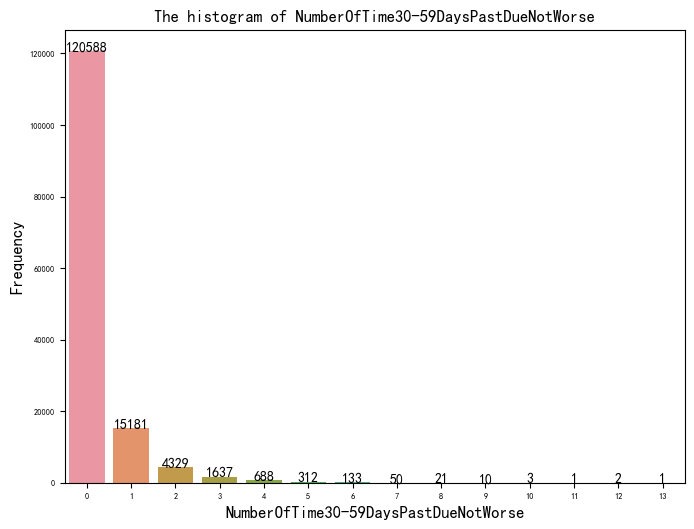

In [66]:
plt.figure(figsize=[8,6],dpi=100) 
g=sns.countplot(x=df['NumberOfTime30-59DaysPastDueNotWorse'],data=df) 
plt.xlabel('NumberOfTime30-59DaysPastDueNotWorse', fontsize=12) 
plt.ylabel('Frequency', fontsize=12) 
plt.tick_params(labelsize=6)
plt.title('The histogram of NumberOfTime30-59DaysPastDueNotWorse')

for x,y in enumerate(df['NumberOfTime30-59DaysPastDueNotWorse'].value_counts().sort_index()): 
     plt.text(x,y + 0.1,'%s' %round(y,1),ha='center')   
plt.show() 

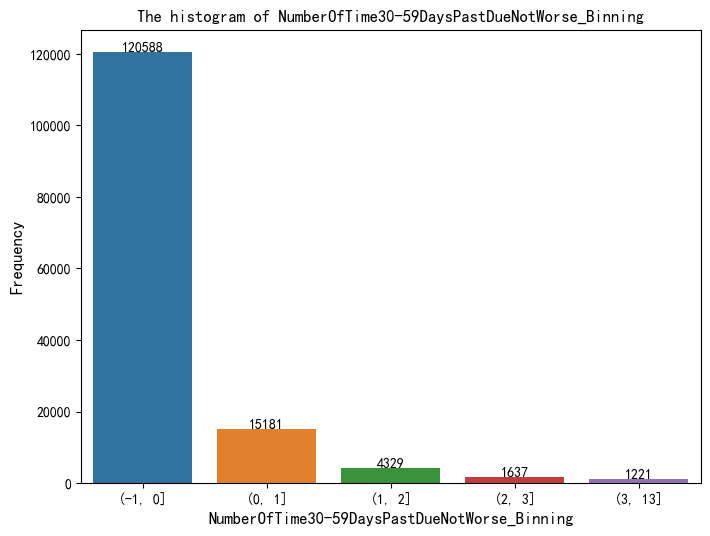

In [67]:
plt.figure(figsize=[8,6],dpi=100) 
g=sns.countplot(x=df['NumberOfTime30-59DaysPastDueNotWorse_Binning'],data=df['NumberOfTime30-59DaysPastDueNotWorse_Binning']) 
plt.xlabel('NumberOfTime30-59DaysPastDueNotWorse_Binning', fontsize=12) 
plt.ylabel('Frequency', fontsize=12) 
plt.title('The histogram of NumberOfTime30-59DaysPastDueNotWorse_Binning')

for x,y in enumerate(df['NumberOfTime30-59DaysPastDueNotWorse_Binning'].value_counts().sort_index()): 
     plt.text(x,y + 0.1,'%s' %round(y,1),ha='center')   
plt.show() 

#### 2.2.2 用户信贷数量

In [68]:
df['NumberOfOpenCreditLinesAndLoans_Binning'] = pd.cut(df['NumberOfOpenCreditLinesAndLoans'],bins=[-1, 0, 2, 4, 8, 12, 17, 29],
                                                       precision=0)

print('The classes of features reduced from', len(df['NumberOfOpenCreditLinesAndLoans'].unique()),
        'to', len(df['NumberOfOpenCreditLinesAndLoans_Binning'].values.unique()))

pd.crosstab(df['NumberOfOpenCreditLinesAndLoans_Binning'],df['SeriousDlqin2yrs'])

e = pd.crosstab(df['NumberOfOpenCreditLinesAndLoans_Binning'],df['SeriousDlqin2yrs'])
e

The classes of features reduced from 30 to 7


SeriousDlqin2yrs                             0     1
NumberOfOpenCreditLinesAndLoans_Binning             
(-1, 0]                                   1276   337
(0, 2]                                    9775  1140
(2, 4]                                   18824  1348
(4, 8]                                   47712  2769
(8, 12]                                  32453  2038
(12, 17]                                 16829  1171
(17, 29]                                  6791   493

In [69]:
e.columns = ['normal','default']
e

normal  default
NumberOfOpenCreditLinesAndLoans_Binning                 
(-1, 0]                                    1276      337
(0, 2]                                     9775     1140
(2, 4]                                    18824     1348
(4, 8]                                    47712     2769
(8, 12]                                   32453     2038
(12, 17]                                  16829     1171
(17, 29]                                   6791      493

* 违约比例

In [70]:
e.eval('sum = normal + default',inplace = True)
e.eval('percentage = default / (normal + default)',inplace = True)
e

normal  default    sum  percentage
NumberOfOpenCreditLinesAndLoans_Binning                                    
(-1, 0]                                    1276      337   1613    0.208927
(0, 2]                                     9775     1140  10915    0.104443
(2, 4]                                    18824     1348  20172    0.066825
(4, 8]                                    47712     2769  50481    0.054852
(8, 12]                                   32453     2038  34491    0.059088
(12, 17]                                  16829     1171  18000    0.065056
(17, 29]                                   6791      493   7284    0.067683

In [71]:
# 定义lamda函数,将值转为百分数的形式
f1 = lambda x:'%.2f%%' % (x*100)

e['percentage'] = e['percentage'].apply(f1)
e

normal  default    sum percentage
NumberOfOpenCreditLinesAndLoans_Binning                                   
(-1, 0]                                    1276      337   1613     20.89%
(0, 2]                                     9775     1140  10915     10.44%
(2, 4]                                    18824     1348  20172      6.68%
(4, 8]                                    47712     2769  50481      5.49%
(8, 12]                                   32453     2038  34491      5.91%
(12, 17]                                  16829     1171  18000      6.51%
(17, 29]                                   6791      493   7284      6.77%

* 用户信贷数量直方图

Text(0.5, 1.0, 'The histogram of NumberOfOpenCreditLinesAndLoans')

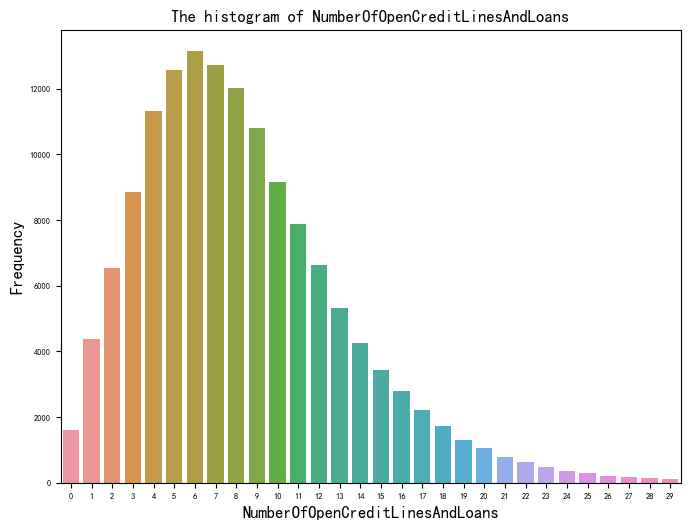

In [72]:
plt.figure(figsize=[8,6],dpi=100) 
g=sns.countplot(x=df['NumberOfOpenCreditLinesAndLoans'],data=df) 
plt.xlabel('NumberOfOpenCreditLinesAndLoans', fontsize=12) 
plt.ylabel('Frequency', fontsize=12) 
plt.tick_params(labelsize=6)
plt.title('The histogram of NumberOfOpenCreditLinesAndLoans')

# for x,y in enumerate(df['NumberOfOpenCreditLinesAndLoans'].value_counts().sort_index()): 
#      plt.text(x,y + 0.1,'%s' %round(y,1),ha='center')   
# plt.show() 

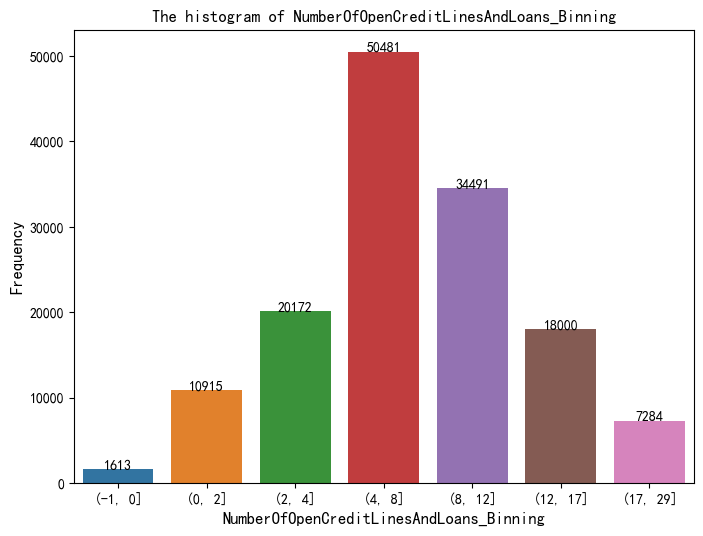

In [73]:
plt.figure(figsize=[8,6],dpi=100) 
g=sns.countplot(x=df['NumberOfOpenCreditLinesAndLoans_Binning'],data=df['NumberOfOpenCreditLinesAndLoans_Binning']) 
plt.xlabel('NumberOfOpenCreditLinesAndLoans_Binning', fontsize=12) 
plt.ylabel('Frequency', fontsize=12) 
plt.title('The histogram of NumberOfOpenCreditLinesAndLoans_Binning')

for x,y in enumerate(df['NumberOfOpenCreditLinesAndLoans_Binning'].value_counts().sort_index()): 
     plt.text(x,y + 0.1,'%s' %round(y,1),ha='center')   
plt.show() 

* 信贷数量核密度图

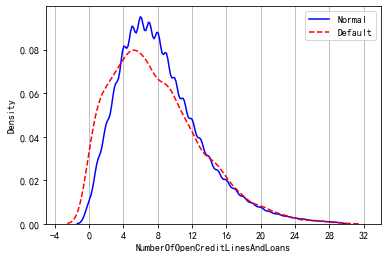

In [74]:
plt.grid(axis='x',linestyle='-')
sns.distplot(df['NumberOfOpenCreditLinesAndLoans'][df['SeriousDlqin2yrs']==0], hist = False, kde_kws = { 'color':'blue', 'linestyle':'-'}, norm_hist = True, label = 'Normal' ) 
sns.distplot(df['NumberOfOpenCreditLinesAndLoans'][df['SeriousDlqin2yrs']==1], hist = False, kde_kws = { 'color':'red', 'linestyle':'--'}, norm_hist = True, label = 'Default' )
plt.legend(loc='upper right')
plt.xlim(-5,34)

# 修改x轴刻度间距为4000
x_major_locator=MultipleLocator(4)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)

plt.savefig('./Figures/The NumberOfOpenCreditLinesAndLoans kernel curve of default and normal users.jpg',dpi=400, bbox_inches='tight')

#### 2.2.3 用户固定资产贷款数

In [75]:
df['NumberRealEstateLoansOrLines_Binning'] = pd.cut(df['NumberRealEstateLoansOrLines'],bins=[-1, 0, 1, 2, 3, 9],
                                                       precision=0)

print('The classes of features reduced from', len(df['NumberRealEstateLoansOrLines'].unique()),
        'to', len(df['NumberRealEstateLoansOrLines_Binning'].values.unique()))

pd.crosstab(df['NumberRealEstateLoansOrLines_Binning'],df['SeriousDlqin2yrs'])

f = pd.crosstab(df['NumberRealEstateLoansOrLines_Binning'],df['SeriousDlqin2yrs'])
f

The classes of features reduced from 10 to 5


SeriousDlqin2yrs                          0     1
NumberRealEstateLoansOrLines_Binning             
(-1, 0]                               50969  4366
(0, 1]                                47704  2627
(1, 2]                                27311  1592
(2, 3]                                 5097   374
(3, 9]                                 2579   337

In [76]:
f.columns = ['normal','default']
f

normal  default
NumberRealEstateLoansOrLines_Binning                 
(-1, 0]                                50969     4366
(0, 1]                                 47704     2627
(1, 2]                                 27311     1592
(2, 3]                                  5097      374
(3, 9]                                  2579      337

* 违约比例

In [77]:
f.eval('sum = normal + default',inplace = True)
f.eval('percentage = default / (normal + default)',inplace = True)
f

normal  default    sum  percentage
NumberRealEstateLoansOrLines_Binning                                    
(-1, 0]                                50969     4366  55335    0.078901
(0, 1]                                 47704     2627  50331    0.052194
(1, 2]                                 27311     1592  28903    0.055081
(2, 3]                                  5097      374   5471    0.068360
(3, 9]                                  2579      337   2916    0.115569

In [78]:
# 定义lamda函数,将值转为百分数的形式
f1 = lambda x:'%.2f%%' % (x*100)

f['percentage'] = f['percentage'].apply(f1)
f

normal  default    sum percentage
NumberRealEstateLoansOrLines_Binning                                   
(-1, 0]                                50969     4366  55335      7.89%
(0, 1]                                 47704     2627  50331      5.22%
(1, 2]                                 27311     1592  28903      5.51%
(2, 3]                                  5097      374   5471      6.84%
(3, 9]                                  2579      337   2916     11.56%

* 固定资产贷款数直方图

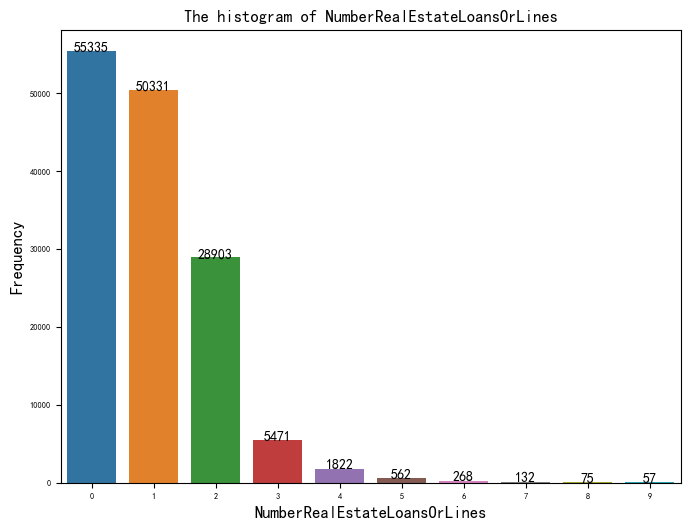

In [79]:
plt.figure(figsize=[8,6],dpi=100) 
g=sns.countplot(x=df['NumberRealEstateLoansOrLines'],data=df) 
plt.xlabel('NumberRealEstateLoansOrLines', fontsize=12) 
plt.ylabel('Frequency', fontsize=12) 
plt.tick_params(labelsize=6)
plt.title('The histogram of NumberRealEstateLoansOrLines')

for x,y in enumerate(df['NumberRealEstateLoansOrLines'].value_counts().sort_index()): 
     plt.text(x,y + 0.1,'%s' %round(y,1),ha='center')   
plt.show() 

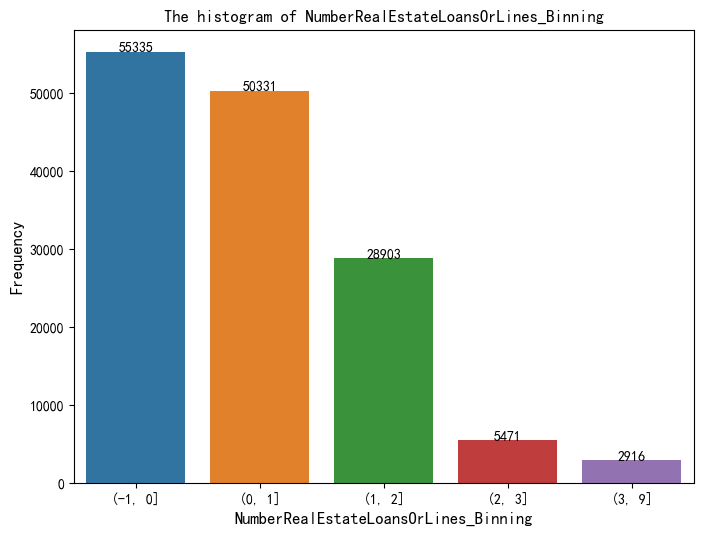

In [80]:
plt.figure(figsize=[8,6],dpi=100) 
g=sns.countplot(x=df['NumberRealEstateLoansOrLines_Binning'],data=df['NumberRealEstateLoansOrLines_Binning']) 
plt.xlabel('NumberRealEstateLoansOrLines_Binning', fontsize=12) 
plt.ylabel('Frequency', fontsize=12) 
plt.title('The histogram of NumberRealEstateLoansOrLines_Binning')

for x,y in enumerate(df['NumberRealEstateLoansOrLines_Binning'].value_counts().sort_index()): 
     plt.text(x,y + 0.1,'%s' %round(y,1),ha='center')   
plt.show() 

#### 2.2.4 用户固定资产贷款数/信贷数量

In [81]:
df['NumberRealEstateLoansOrLines/NumberOfOpenCreditLinesAndLoans'] = df['NumberRealEstateLoansOrLines']/df['NumberOfOpenCreditLinesAndLoans']
df.fillna(value = { 'NumberRealEstateLoansOrLines/NumberOfOpenCreditLinesAndLoans': df[
                    'NumberRealEstateLoansOrLines/NumberOfOpenCreditLinesAndLoans'].mean()},inplace=True)

In [82]:
df['NumberRealEstateLoansOrLines/NumberOfOpenCreditLinesAndLoans_Binning'] = pd.cut(df['NumberRealEstateLoansOrLines/NumberOfOpenCreditLinesAndLoans'],bins=[-1, 0.1, 0.2, 0.3, 0.4, 0.5, 1],
                                                       precision=0)

print('The classes of features reduced from', len(df['NumberRealEstateLoansOrLines/NumberOfOpenCreditLinesAndLoans'].unique()),
        'to', len(df['NumberRealEstateLoansOrLines/NumberOfOpenCreditLinesAndLoans_Binning'].values.unique()))

pd.crosstab(df['NumberRealEstateLoansOrLines/NumberOfOpenCreditLinesAndLoans_Binning'],df['SeriousDlqin2yrs'])

g = pd.crosstab(df['NumberRealEstateLoansOrLines/NumberOfOpenCreditLinesAndLoans_Binning'],df['SeriousDlqin2yrs'])
g

The classes of features reduced from 142 to 6


SeriousDlqin2yrs                                        0     1
NumberRealEstateLoansOrLines/NumberOfOpenCredit...             
(-1.0, 0.1]                                         68250  5087
(0.1, 0.2]                                          39578  2396
(0.2, 0.3]                                          14230   873
(0.3, 0.4]                                           7679   507
(0.4, 0.5]                                           2890   269
(0.5, 1.0]                                           1033   164

In [83]:
g.columns = ['normal','default']
g

normal  default
NumberRealEstateLoansOrLines/NumberOfOpenCredit...                 
(-1.0, 0.1]                                          68250     5087
(0.1, 0.2]                                           39578     2396
(0.2, 0.3]                                           14230      873
(0.3, 0.4]                                            7679      507
(0.4, 0.5]                                            2890      269
(0.5, 1.0]                                            1033      164

In [84]:
g.eval('sum = normal + default',inplace = True)
g.eval('percentage = default / (normal + default)',inplace = True)
g

normal  default    sum  \
NumberRealEstateLoansOrLines/NumberOfOpenCredit...                           
(-1.0, 0.1]                                          68250     5087  73337   
(0.1, 0.2]                                           39578     2396  41974   
(0.2, 0.3]                                           14230      873  15103   
(0.3, 0.4]                                            7679      507   8186   
(0.4, 0.5]                                            2890      269   3159   
(0.5, 1.0]                                            1033      164   1197   

                                                    percentage  
NumberRealEstateLoansOrLines/NumberOfOpenCredit...              
(-1.0, 0.1]                                           0.069365  
(0.1, 0.2]                                            0.057083  
(0.2, 0.3]                                            0.057803  
(0.3, 0.4]                                            0.061935  
(0.4, 0.5]                                            0.085154  
(0.5, 1.0]                                            0.137009

In [85]:
# 定义lamda函数,将值转为百分数的形式
f1 = lambda x:'%.2f%%' % (x*100)

g['percentage'] = g['percentage'].apply(f1)
g

normal  default    sum  \
NumberRealEstateLoansOrLines/NumberOfOpenCredit...                           
(-1.0, 0.1]                                          68250     5087  73337   
(0.1, 0.2]                                           39578     2396  41974   
(0.2, 0.3]                                           14230      873  15103   
(0.3, 0.4]                                            7679      507   8186   
(0.4, 0.5]                                            2890      269   3159   
(0.5, 1.0]                                            1033      164   1197   

                                                   percentage  
NumberRealEstateLoansOrLines/NumberOfOpenCredit...             
(-1.0, 0.1]                                             6.94%  
(0.1, 0.2]                                              5.71%  
(0.2, 0.3]                                              5.78%  
(0.3, 0.4]                                              6.19%  
(0.4, 0.5]                                              8.52%  
(0.5, 1.0]                                             13.70%

* 固定资产贷款数与信贷数量比直方图

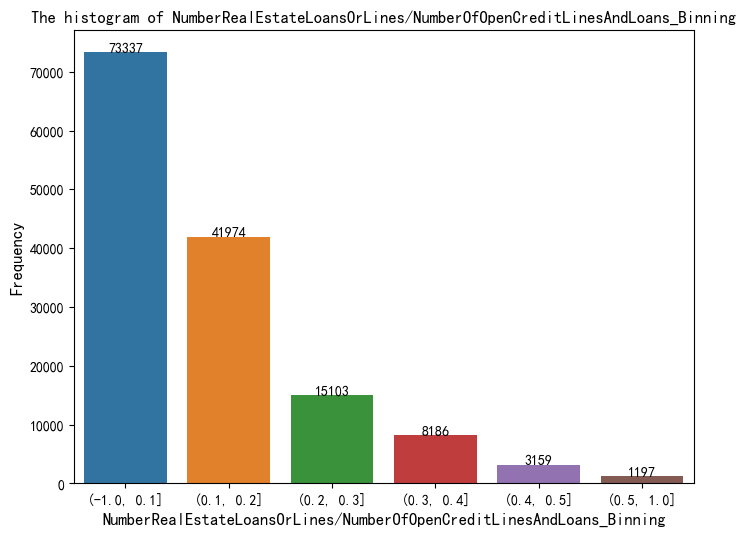

In [86]:
plt.figure(figsize=[8,6],dpi=100) 
g=sns.countplot(x=df['NumberRealEstateLoansOrLines/NumberOfOpenCreditLinesAndLoans_Binning'],data=df['NumberRealEstateLoansOrLines/NumberOfOpenCreditLinesAndLoans']) 
plt.xlabel('NumberRealEstateLoansOrLines/NumberOfOpenCreditLinesAndLoans_Binning', fontsize=12) 
plt.ylabel('Frequency', fontsize=12) 
plt.title('The histogram of NumberRealEstateLoansOrLines/NumberOfOpenCreditLinesAndLoans_Binning')

for x,y in enumerate(df['NumberRealEstateLoansOrLines/NumberOfOpenCreditLinesAndLoans_Binning'].value_counts().sort_index()): 
     plt.text(x,y + 0.1,'%s' %round(y,1),ha='center')   
plt.show() 

* 固定资产贷款数与信贷数量比的核密度图

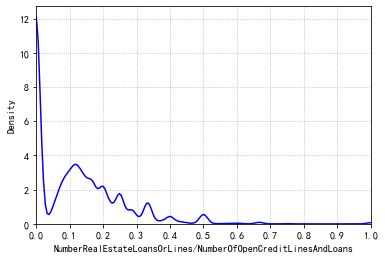

In [87]:
plt.grid(linestyle='dotted')
sns.distplot(df['NumberRealEstateLoansOrLines/NumberOfOpenCreditLinesAndLoans'], hist = False, kde_kws = { 'color':'blue', 'linestyle':'-'}, norm_hist = True, label = 'NumberRealEstateLoansOrLines/NumberOfOpenCreditLinesAndLoans' ) 
# plt.legend(loc='upper right')
plt.xlim(0.0,1.0)

# 修改x轴刻度间距为0.1
x_major_locator=MultipleLocator(0.1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)

plt.savefig('./Figures/The kernel curve of NumberRealEstateLoansOrLines:NumberOfOpenCreditLinesAndLoans.jpg',dpi=400, bbox_inches='tight')

#### 2.2.5 可用信贷额度比例

In [88]:
df['RevolvingUtilizationOfUnsecuredLines_Binning'] = pd.cut(df['RevolvingUtilizationOfUnsecuredLines'], bins=[-1.00, 0.45, 1.50], 
                            precision=0)

print('The classes of features reduced from', len(df['RevolvingUtilizationOfUnsecuredLines'].unique()),
        'to', len(df['RevolvingUtilizationOfUnsecuredLines_Binning'].values.unique()))

h = pd.crosstab(df['RevolvingUtilizationOfUnsecuredLines_Binning'],df['SeriousDlqin2yrs'])
h

The classes of features reduced from 119754 to 2


SeriousDlqin2yrs                                  0     1
RevolvingUtilizationOfUnsecuredLines_Binning             
(-1.0, 0.0]                                   98471  2617
(0.0, 2.0]                                    35189  6679

In [89]:
h.columns = ['normal','default']
h

normal  default
RevolvingUtilizationOfUnsecuredLines_Binning                 
(-1.0, 0.0]                                    98471     2617
(0.0, 2.0]                                     35189     6679

In [90]:
h.eval('sum = normal + default',inplace = True)
h

normal  default     sum
RevolvingUtilizationOfUnsecuredLines_Binning                         
(-1.0, 0.0]                                    98471     2617  101088
(0.0, 2.0]                                     35189     6679   41868

In [91]:
h.index = ['less than 0.45','more than 0.45']
h

normal  default     sum
less than 0.45   98471     2617  101088
more than 0.45   35189     6679   41868

* 可用信贷额度比例直方图

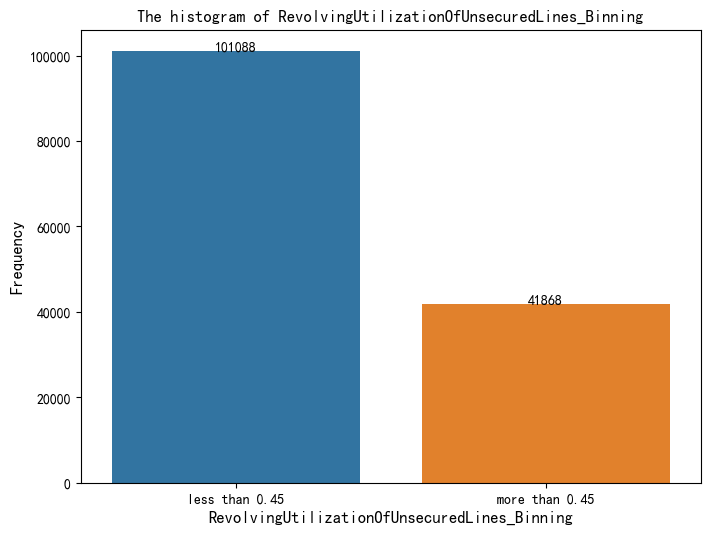

In [92]:
plt.figure(figsize=[8,6],dpi=100) 
g=sns.countplot(x=df['RevolvingUtilizationOfUnsecuredLines_Binning'],data=df['RevolvingUtilizationOfUnsecuredLines_Binning']) 
plt.gca().set_xticklabels(['less than 0.45', 'more than 0.45'])
plt.xlabel('RevolvingUtilizationOfUnsecuredLines_Binning', fontsize=12) 
plt.ylabel('Frequency', fontsize=12) 
plt.title('The histogram of RevolvingUtilizationOfUnsecuredLines_Binning')

for x,y in enumerate(df['RevolvingUtilizationOfUnsecuredLines_Binning'].value_counts().sort_index()): 
     plt.text(x,y + 0.1,'%s' %round(y,1),ha='center')   
plt.show() 

* 可用信贷额度核密度图

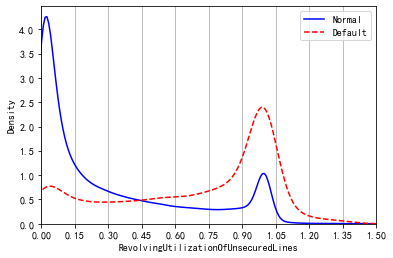

In [93]:
plt.grid(axis='x',linestyle='-')
sns.distplot(df['RevolvingUtilizationOfUnsecuredLines'][df['SeriousDlqin2yrs']==0], hist = False, kde_kws = { 'color':'blue', 'linestyle':'-'}, norm_hist = True, label = 'Normal' ) 
sns.distplot(df['RevolvingUtilizationOfUnsecuredLines'][df['SeriousDlqin2yrs']==1], hist = False, kde_kws = { 'color':'red', 'linestyle':'--'}, norm_hist = True, label = 'Default' )
plt.legend(loc='upper right')
plt.xlim(0.00,1.50)

# 修改x轴刻度间距为0.15
x_major_locator=MultipleLocator(0.15)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)

plt.savefig('./Figures/The RevolvingUtilizationOfUnsecuredLines kernel curve of default and normal users.jpg',dpi=400, bbox_inches='tight')

## 3. 删除分箱前的列

In [94]:
df = df.drop(['RevolvingUtilizationOfUnsecuredLines','age','NumberOfDependents','DebtRatio',
               'NumberOfTime30-59DaysPastDueNotWorse','NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines','MonthlyIncome',
               'PastdueRatio'],axis=1)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142956 entries, 0 to 142955
Data columns (total 20 columns):
 #   Column                                                                Non-Null Count   Dtype   
---  ------                                                                --------------   -----   
 0   ID                                                                    142956 non-null  int64   
 1   SeriousDlqin2yrs                                                      142956 non-null  int64   
 2   RevolvingUtilizationOfUnsecuredLines_log                              142956 non-null  float64 
 3   age_log                                                               142956 non-null  float64 
 4   NumberOfTime30-59DaysPastDueNotWorse_log                              142956 non-null  float64 
 5   DebtRatio_log                                                         142956 non-null  float64 
 6   MonthlyIncome_log                                                     142956

In [96]:
ID_col = ['ID'] 
label = ['SeriousDlqin2yrs']
cat_col1 = df.nunique()[df.nunique()==2].keys().tolist()
cat_col2 = ['NumberOfDependents_Binning', 'age_Binning','NumberOfTime30-59DaysPastDueNotWorse_Binning',
            'NumberOfOpenCreditLinesAndLoans_Binning','NumberRealEstateLoansOrLines_Binning',
            'NumberRealEstateLoansOrLines/NumberOfOpenCreditLinesAndLoans_Binning'
           ]
num_col = ['RevolvingUtilizationOfUnsecuredLines_log','age_log','NumberOfTime30-59DaysPastDueNotWorse_log',
           'DebtRatio_log','MonthlyIncome_log','NumberOfOpenCreditLinesAndLoans_log','NumberRealEstateLoansOrLines_log',
           'NumberOfDependents_log','PastdueRatio_log','NumberRealEstateLoansOrLines/NumberOfOpenCreditLinesAndLoans'
           ]

In [97]:
cat_col1

['SeriousDlqin2yrs',
 'MonthlyIncome_Binning',
 'RevolvingUtilizationOfUnsecuredLines_Binning']

In [98]:
cat_col2 

['NumberOfDependents_Binning',
 'age_Binning',
 'NumberOfTime30-59DaysPastDueNotWorse_Binning',
 'NumberOfOpenCreditLinesAndLoans_Binning',
 'NumberRealEstateLoansOrLines_Binning',
 'NumberRealEstateLoansOrLines/NumberOfOpenCreditLinesAndLoans_Binning']

In [99]:
num_col

['RevolvingUtilizationOfUnsecuredLines_log',
 'age_log',
 'NumberOfTime30-59DaysPastDueNotWorse_log',
 'DebtRatio_log',
 'MonthlyIncome_log',
 'NumberOfOpenCreditLinesAndLoans_log',
 'NumberRealEstateLoansOrLines_log',
 'NumberOfDependents_log',
 'PastdueRatio_log',
 'NumberRealEstateLoansOrLines/NumberOfOpenCreditLinesAndLoans']

## 4. 特征工程

### 4.1 类别性变量的哑元化（特征提取：One-hot code）

In [100]:
cat_col3 = cat_col2 + ['MonthlyIncome_Binning','RevolvingUtilizationOfUnsecuredLines_Binning']
cat_col3

['NumberOfDependents_Binning',
 'age_Binning',
 'NumberOfTime30-59DaysPastDueNotWorse_Binning',
 'NumberOfOpenCreditLinesAndLoans_Binning',
 'NumberRealEstateLoansOrLines_Binning',
 'NumberRealEstateLoansOrLines/NumberOfOpenCreditLinesAndLoans_Binning',
 'MonthlyIncome_Binning',
 'RevolvingUtilizationOfUnsecuredLines_Binning']

In [101]:
dummy = pd.get_dummies(df[cat_col3].astype('category'))

### 4.2 数值型变量缩放

In [102]:
import sklearn.preprocessing as preproc

* minmax缩放

In [103]:
from sklearn.preprocessing import MinMaxScaler 
minmax = MinMaxScaler()

In [104]:
num_names=df[num_col].columns+"_minmax" 
minmax = minmax.fit_transform(df[num_col]) 
minmax = pd.DataFrame(columns=num_names,data = minmax) 

df = pd.concat([df[ID_col + label], dummy, minmax], axis = 1) 
print(df.shape)

(142956, 51)


In [105]:
# # 标准化缩放

# num_names=df[num_col].columns + '_std'
# num_names

# std = preproc.StandardScaler().fit_transform(df[num_col])
# std = pd.DataFrame(columns= num_names, data= std)

# df = pd.concat([df[ID_col + cat_col1],dummy,std],axis= 1)

# print(df.shape)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142956 entries, 0 to 142955
Data columns (total 51 columns):
 #   Column                                                                            Non-Null Count   Dtype  
---  ------                                                                            --------------   -----  
 0   ID                                                                                142956 non-null  int64  
 1   SeriousDlqin2yrs                                                                  142956 non-null  int64  
 2   NumberOfDependents_Binning_(-1, 0]                                                142956 non-null  uint8  
 3   NumberOfDependents_Binning_(0, 1]                                                 142956 non-null  uint8  
 4   NumberOfDependents_Binning_(1, 2]                                                 142956 non-null  uint8  
 5   NumberOfDependents_Binning_(2, 3]                                                 142956 non-null  u

In [107]:
df.head()

ID  SeriousDlqin2yrs  NumberOfDependents_Binning_(-1, 0]  \
0   1                 1                                   0   
1   2                 0                                   0   
2   3                 0                                   1   
3   4                 0                                   1   
4   6                 0                                   0   

   NumberOfDependents_Binning_(0, 1]  NumberOfDependents_Binning_(1, 2]  \
0                                  0                                  1   
1                                  1                                  0   
2                                  0                                  0   
3                                  0                                  0   
4                                  1                                  0   

   NumberOfDependents_Binning_(2, 3]  NumberOfDependents_Binning_(3, 4]  \
0                                  0                                  0   
1                                  0                                  0   
2                                  0                                  0   
3                                  0                                  0   
4                                  0                                  0   

   NumberOfDependents_Binning_(4, 9]  age_Binning_(18, 25]  \
0                                  0                     0   
1                                  0                     0   
2                                  0                     0   
3                                  0                     0   
4                                  0                     0   

   age_Binning_(25, 35]  ...  RevolvingUtilizationOfUnsecuredLines_log_minmax  \
0                     0  ...                                         0.650108   
1                     0  ...                                         0.767492   
2                     0  ...                                         0.578023   
3                     1  ...                                         0.240145   
4                     0  ...                                         0.220872   

   age_log_minmax  NumberOfTime30-59DaysPastDueNotWorse_log_minmax  \
0        0.487144                                          0.41629   
1        0.411147                                          0.00000   
2        0.378118                                          0.26265   
3        0.226497                                          0.00000   
4        0.810001                                          0.00000   

   DebtRatio_log_minmax  MonthlyIncome_log_minmax  \
0              0.073622                  0.843136   
1              0.014364                  0.727120   
2              0.010202                  0.741633   
3              0.004423                  0.749158   
4              0.039830                  0.754597   

   NumberOfOpenCreditLinesAndLoans_log_minmax  \
0                                    0.775920   
1                                    0.473197   
2                                    0.323008   
3                                    0.526803   
4                                    0.407590   

   NumberRealEstateLoansOrLines_log_minmax  NumberOfDependents_log_minmax  \
0                                 0.845098                       0.477121   
1                                 0.000000                       0.301030   
2                                 0.000000                       0.000000   
3                                 0.000000                       0.000000   
4                                 0.301030                       0.301030   

   PastdueRatio_log_minmax  \
0                      0.0   
1                      0.0   
2                      0.0   
3                      0.0   
4                      0.0   

   NumberRealEstateLoansOrLines/NumberOfOpenCreditLinesAndLoans_minmax  
0                                           0.461538                    
1                                    

In [129]:
y = array(df['SeriousDlqin2yrs'])
y

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [109]:
df1 = df.drop(columns =['ID','SeriousDlqin2yrs'])
df1

NumberOfDependents_Binning_(-1, 0]  NumberOfDependents_Binning_(0, 1]  \
0                                        0                                  0   
1                                        0                                  1   
2                                        1                                  0   
3                                        1                                  0   
4                                        0                                  1   
...                                    ...                                ...   
142951                                   1                                  0   
142952                                   1                                  0   
142953                                   0                                  0   
142954                                   1                                  0   
142955                                   1                                  0   

        NumberOfDependents_Binning_(1, 2]  NumberOfDependents_Binning_(2, 3]  \
0                                       1                                  0   
1                                       0                                  0   
2                                       0                                  0   
3                                       0                                  0   
4                                       0                                  0   
...                                   ...                                ...   
142951                                  0                                  0   
142952                                  0                                  0   
142953                                  1                                  0   
142954                                  0                                  0   
142955                                  0                                  0   

        NumberOfDependents_Binning_(3, 4]  NumberOfDependents_Binning_(4, 9]  \
0                                       0                                  0   
1                                       0                                  0   
2                                       0                                  0   
3                                       0                                  0   
4                                       0                                  0   
...                                   ...                                ...   
142951                                  0                                  0   
142952                                  0                                  0   
142953                                  0                                  0   
142954                                  0                                  0   
142955                                  0                                  0   

        age_Binning_(18, 25]  age_Binning_(25, 35]  age_Binning_(35, 45]  \
0                          0                     0                     1   
1                          0                     0                     1   
2                          0                     0                     1   
3                          0                     1                     0   
4                          0                     0                     0   
...                      ...                   ...                   ...   
142951                     0                     0                     0   
142952                     0                     0                     0   
142953                     0                     0                     1   
142954                     0                     1                     0   
142955                     0                     0                     0   

        age_Binning_(45, 55]  ...  \
0                          0  ...   
1                          0  ...   
2                          0  ...   
3                          0  ...   
4              

In [130]:
X = array(df1)
X

array([[0.        , 0.        , 1.        , ..., 0.47712125, 0.        ,
        0.46153846],
       [0.        , 1.        , 0.        , ..., 0.30103   , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.47712125, 0.        ,
        0.25      ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.25      ]])

## 4.3 特征筛选

### 4.3.1 特征重要性排序

[09:42:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature: 0, Score: 0.01313
Feature: 1, Score: 0.01139
Feature: 2, Score: 0.00930
Feature: 3, Score: 0.01058
Feature: 4, Score: 0.01669
Feature: 5, Score: 0.01086
Feature: 6, Score: 0.01827
Feature: 7, Score: 0.00999
Feature: 8, Score: 0.01044
Feature: 9, Score: 0.01142
Feature: 10, Score: 0.01180
Feature: 11, Score: 0.01220
Feature: 12, Score: 0.20778
Feature: 13, Score: 0.04327
Feature: 14, Score: 0.01651
Feature: 15, Score: 0.01271
Feature: 16, Score: 0.01847
Feature: 17, Score: 0.03805
Feature: 18, Score: 0.00681
Feature: 19, Score: 0.01141
Feature: 20, Score: 0.01546
Feature: 21, Score: 0.01118
Feature: 22, Score: 0.01370
Feature: 23, Score: 0.01748
Feature: 24, Score: 0.01825


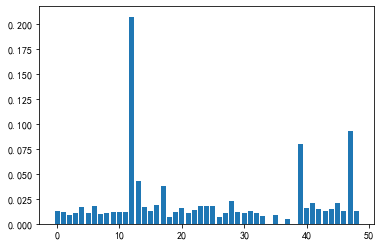

In [111]:
# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot

# define the model
model = XGBClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [112]:
importance

array([0.01312636, 0.01138597, 0.0093019 , 0.01058123, 0.0166905 ,
       0.01085604, 0.01827248, 0.00999153, 0.0104385 , 0.0114184 ,
       0.01180395, 0.01220074, 0.20777826, 0.04326658, 0.01651034,
       0.0127088 , 0.01847331, 0.03804796, 0.00680752, 0.0114065 ,
       0.01545776, 0.01118463, 0.01369926, 0.01747886, 0.01824838,
       0.01784545, 0.00687685, 0.01086453, 0.02272947, 0.0116729 ,
       0.01051827, 0.01256395, 0.01093682, 0.00738624, 0.        ,
       0.00886992, 0.        , 0.00450637, 0.        , 0.08017761,
       0.0154004 , 0.02060288, 0.01440233, 0.01300357, 0.01451553,
       0.02075685, 0.01288248, 0.09339835, 0.01295339], dtype=float32)

In [113]:
a1 = list(importance)
a1

[0.013126363,
 0.011385966,
 0.009301897,
 0.0105812345,
 0.016690496,
 0.010856038,
 0.018272478,
 0.009991533,
 0.010438501,
 0.011418405,
 0.011803948,
 0.012200744,
 0.20777826,
 0.043266583,
 0.01651034,
 0.012708802,
 0.01847331,
 0.038047962,
 0.00680752,
 0.011406499,
 0.015457756,
 0.011184633,
 0.0136992615,
 0.017478865,
 0.018248385,
 0.017845448,
 0.0068768533,
 0.01086453,
 0.022729468,
 0.011672897,
 0.010518266,
 0.012563947,
 0.010936818,
 0.007386241,
 0.0,
 0.008869916,
 0.0,
 0.0045063714,
 0.0,
 0.080177605,
 0.0154003985,
 0.020602876,
 0.014402328,
 0.013003565,
 0.014515526,
 0.020756854,
 0.0128824795,
 0.09339835,
 0.012953392]

In [114]:
features = array(df1.columns)
features

array(['NumberOfDependents_Binning_(-1, 0]',
       'NumberOfDependents_Binning_(0, 1]',
       'NumberOfDependents_Binning_(1, 2]',
       'NumberOfDependents_Binning_(2, 3]',
       'NumberOfDependents_Binning_(3, 4]',
       'NumberOfDependents_Binning_(4, 9]', 'age_Binning_(18, 25]',
       'age_Binning_(25, 35]', 'age_Binning_(35, 45]',
       'age_Binning_(45, 55]', 'age_Binning_(55, 65]',
       'age_Binning_(65, 99]',
       'NumberOfTime30-59DaysPastDueNotWorse_Binning_(-1, 0]',
       'NumberOfTime30-59DaysPastDueNotWorse_Binning_(0, 1]',
       'NumberOfTime30-59DaysPastDueNotWorse_Binning_(1, 2]',
       'NumberOfTime30-59DaysPastDueNotWorse_Binning_(2, 3]',
       'NumberOfTime30-59DaysPastDueNotWorse_Binning_(3, 13]',
       'NumberOfOpenCreditLinesAndLoans_Binning_(-1, 0]',
       'NumberOfOpenCreditLinesAndLoans_Binning_(0, 2]',
       'NumberOfOpenCreditLinesAndLoans_Binning_(2, 4]',
       'NumberOfOpenCreditLinesAndLoans_Binning_(4, 8]',
       'NumberOfOpenCreditLin

In [115]:
a2 = list(features)
a2

['NumberOfDependents_Binning_(-1, 0]',
 'NumberOfDependents_Binning_(0, 1]',
 'NumberOfDependents_Binning_(1, 2]',
 'NumberOfDependents_Binning_(2, 3]',
 'NumberOfDependents_Binning_(3, 4]',
 'NumberOfDependents_Binning_(4, 9]',
 'age_Binning_(18, 25]',
 'age_Binning_(25, 35]',
 'age_Binning_(35, 45]',
 'age_Binning_(45, 55]',
 'age_Binning_(55, 65]',
 'age_Binning_(65, 99]',
 'NumberOfTime30-59DaysPastDueNotWorse_Binning_(-1, 0]',
 'NumberOfTime30-59DaysPastDueNotWorse_Binning_(0, 1]',
 'NumberOfTime30-59DaysPastDueNotWorse_Binning_(1, 2]',
 'NumberOfTime30-59DaysPastDueNotWorse_Binning_(2, 3]',
 'NumberOfTime30-59DaysPastDueNotWorse_Binning_(3, 13]',
 'NumberOfOpenCreditLinesAndLoans_Binning_(-1, 0]',
 'NumberOfOpenCreditLinesAndLoans_Binning_(0, 2]',
 'NumberOfOpenCreditLinesAndLoans_Binning_(2, 4]',
 'NumberOfOpenCreditLinesAndLoans_Binning_(4, 8]',
 'NumberOfOpenCreditLinesAndLoans_Binning_(8, 12]',
 'NumberOfOpenCreditLinesAndLoans_Binning_(12, 17]',
 'NumberOfOpenCreditLinesAndL

* 将特征重要性按从大到小的顺序排列

In [116]:
feature_importance = pd.DataFrame(a1, columns = ['importance'],index = a2)
feature_importance = feature_importance.sort_values(by = 'importance',ascending=False)
feature_importance

importance
NumberOfTime30-59DaysPastDueNotWorse_Binning_(-...    0.207778
PastdueRatio_log_minmax                               0.093398
RevolvingUtilizationOfUnsecuredLines_log_minmax       0.080178
NumberOfTime30-59DaysPastDueNotWorse_Binning_(0...    0.043267
NumberOfOpenCreditLinesAndLoans_Binning_(-1, 0]       0.038048
NumberRealEstateLoansOrLines_Binning_(3, 9]           0.022729
NumberRealEstateLoansOrLines_log_minmax               0.020757
NumberOfTime30-59DaysPastDueNotWorse_log_minmax       0.020603
NumberOfTime30-59DaysPastDueNotWorse_Binning_(3...    0.018473
age_Binning_(18, 25]                                  0.018272
NumberRealEstateLoansOrLines_Binning_(-1, 0]          0.018248
NumberRealEstateLoansOrLines_Binning_(0, 1]           0.017845
NumberOfOpenCreditLinesAndLoans_Binning_(17, 29]      0.017479
NumberOfDependents_Binning_(3, 4]                     0.016690
NumberOfTime30-59DaysPastDueNotWorse_Binning_(1...    0.016510
NumberOfOpenCreditLinesAndLoans_Binning_(4, 8]        0.015458
age_log_minmax                                        0.015400
NumberOfOpenCreditLinesAndLoans_log_minmax            0.014516
DebtRatio_log_minmax                                  0.014402
NumberOfOpenCreditLinesAndLoans_Binning_(12, 17]      0.013699
NumberOfDependents_Binning_(-1, 0]                    0.013126
MonthlyIncome_log_minmax                              0.013004
NumberRealEstateLoansOrLines/NumberOfOpenCredit...    0.012953
NumberOfDependents_log_minmax                         0.012882
NumberOfTime30-59DaysPastDueNotWorse_Binning_(2...    0.012709
NumberRealEstateLoansOrLines/NumberOfOpenCredit...    0.012564
age_Binning_(65, 99]                                  0.012201
age_Binning_(55, 65]                                  0.011804
NumberRealEstateLoansOrLines/NumberOfOpenCredit...    0.011673
age_Binning_(45, 55]                                  0.011418
NumberOfOpenCreditLinesAndLoans_Binning_(2, 4]        0.011406
NumberOfDependents_Binning_(0, 1]                     0.011386
NumberOfOpenCreditLinesAndLoans_Binning_(8, 12]       0.011185
NumberRealEstateLoansOrLines/NumberOfOpenCredit...    0.010937
NumberRealEstateLoansOrLines_Binning_(2, 3]           0.010865
NumberOfDependents_Binning_(4, 9]                     0.010856
NumberOfDependents_Binning_(2, 3]                     0.010581
NumberRealEstateLoansOrLines/NumberOfOpenCredit...    0.010518
age_Binning_(35, 45]                                  0.010439
age_Binning_(25, 35]                                  0.009992
NumberOfDependents_Binning_(1, 2]                     0.009302
MonthlyIncome_Binning_(-10000, 12000]                 0.008870
NumberRealEstateLoansOrLines/NumberOfOpenCredit...    0.007386
NumberRealEstateLoansOrLines_Binning_(1, 2]           0.006877
NumberOfOpenCreditLinesAndLoans_Binning_(0, 2]        0.006808
RevolvingUtilizationOfUnsecuredLines_Binning_(-...    0.004506
NumberRealEstateLoansOrLines/NumberOfOpenCredit...    0.000000
MonthlyIncome_Binning_(12000, 49750]                  0.000000
RevolvingUtilizationOfUnsecuredLines_Binning_(0...    0.000000

* 选出特征重要性最高的22个特征

In [117]:
feature_importance1 = feature_importance.drop(index=feature_importance[feature_importance.importance < 0.0130].index)
feature_importance1 = feature_importance1.sort_values(by = 'importance',ascending=True)
feature_importance1

importance
MonthlyIncome_log_minmax                              0.013004
NumberOfDependents_Binning_(-1, 0]                    0.013126
NumberOfOpenCreditLinesAndLoans_Binning_(12, 17]      0.013699
DebtRatio_log_minmax                                  0.014402
NumberOfOpenCreditLinesAndLoans_log_minmax            0.014516
age_log_minmax                                        0.015400
NumberOfOpenCreditLinesAndLoans_Binning_(4, 8]        0.015458
NumberOfTime30-59DaysPastDueNotWorse_Binning_(1...    0.016510
NumberOfDependents_Binning_(3, 4]                     0.016690
NumberOfOpenCreditLinesAndLoans_Binning_(17, 29]      0.017479
NumberRealEstateLoansOrLines_Binning_(0, 1]           0.017845
NumberRealEstateLoansOrLines_Binning_(-1, 0]          0.018248
age_Binning_(18, 25]                                  0.018272
NumberOfTime30-59DaysPastDueNotWorse_Binning_(3...    0.018473
NumberOfTime30-59DaysPastDueNotWorse_log_minmax       0.020603
NumberRealEstateLoansOrLines_log_minmax               0.020757
NumberRealEstateLoansOrLines_Binning_(3, 9]           0.022729
NumberOfOpenCreditLinesAndLoans_Binning_(-1, 0]       0.038048
NumberOfTime30-59DaysPastDueNotWorse_Binning_(0...    0.043267
RevolvingUtilizationOfUnsecuredLines_log_minmax       0.080178
PastdueRatio_log_minmax                               0.093398
NumberOfTime30-59DaysPastDueNotWorse_Binning_(-...    0.207778

In [118]:
feature_importance1.shape

(22, 1)

In [119]:
feature_importance1['importance']

MonthlyIncome_log_minmax                                0.013004
NumberOfDependents_Binning_(-1, 0]                      0.013126
NumberOfOpenCreditLinesAndLoans_Binning_(12, 17]        0.013699
DebtRatio_log_minmax                                    0.014402
NumberOfOpenCreditLinesAndLoans_log_minmax              0.014516
age_log_minmax                                          0.015400
NumberOfOpenCreditLinesAndLoans_Binning_(4, 8]          0.015458
NumberOfTime30-59DaysPastDueNotWorse_Binning_(1, 2]     0.016510
NumberOfDependents_Binning_(3, 4]                       0.016690
NumberOfOpenCreditLinesAndLoans_Binning_(17, 29]        0.017479
NumberRealEstateLoansOrLines_Binning_(0, 1]             0.017845
NumberRealEstateLoansOrLines_Binning_(-1, 0]            0.018248
age_Binning_(18, 25]                                    0.018272
NumberOfTime30-59DaysPastDueNotWorse_Binning_(3, 13]    0.018473
NumberOfTime30-59DaysPastDueNotWorse_log_minmax         0.020603
NumberRealEstateLoansOrLi

* 重要性排序可视化

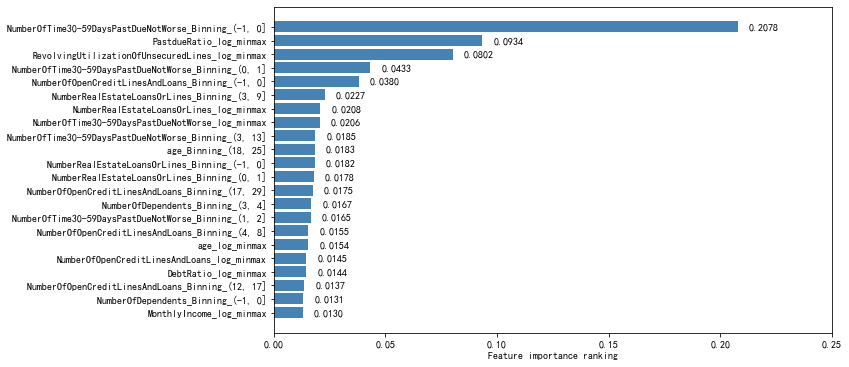

In [120]:
x = feature_importance1.shape[0]
# 缺失值比例可视化展示
# plt.style.use('ggplot')
fig = plt.figure(figsize=(10,6)) # 图形大小
plt.barh(range(x),feature_importance1['importance'],color= 'steelblue')

# 添加轴标签
plt.xlabel('Feature importance ranking')

# 添加刻度标签
columns1=feature_importance1.index.values.tolist() # 列名称
plt.yticks(range(x),columns1)

# 设置X轴的刻度范围
plt.xlim([0, 0.25])

# 显示数据标签
for x,y in enumerate(feature_importance1['importance']):
    plt.text(y + 0.005,x,'%.4f'%y, va='center')

### 4.3.2 相关系数排序

In [121]:
df2 = df.drop(columns =['ID'])
df2

SeriousDlqin2yrs  NumberOfDependents_Binning_(-1, 0]  \
0                      1                                   0   
1                      0                                   0   
2                      0                                   1   
3                      0                                   1   
4                      0                                   0   
...                  ...                                 ...   
142951                 0                                   1   
142952                 0                                   1   
142953                 0                                   0   
142954                 0                                   1   
142955                 0                                   1   

        NumberOfDependents_Binning_(0, 1]  NumberOfDependents_Binning_(1, 2]  \
0                                       0                                  1   
1                                       1                                  0   
2                                       0                                  0   
3                                       0                                  0   
4                                       1                                  0   
...                                   ...                                ...   
142951                                  0                                  0   
142952                                  0                                  0   
142953                                  0                                  1   
142954                                  0                                  0   
142955                                  0                                  0   

        NumberOfDependents_Binning_(2, 3]  NumberOfDependents_Binning_(3, 4]  \
0                                       0                                  0   
1                                       0                                  0   
2                                       0                                  0   
3                                       0                                  0   
4                                       0                                  0   
...                                   ...                                ...   
142951                                  0                                  0   
142952                                  0                                  0   
142953                                  0                                  0   
142954                                  0                                  0   
142955                                  0                                  0   

        NumberOfDependents_Binning_(4, 9]  age_Binning_(18, 25]  \
0                                       0                     0   
1                                       0                     0   
2                                       0                     0   
3                                       0                     0   
4                                       0                     0   
...                                   ...                   ...   
142951                                  0                     0   
142952                                  0                     0   
142953                                  0                     0   
142954                                  0                     0   
142955                                  0                     0   

        age_Binning_(25, 35]  age_Binning_(35, 45]  ...  \
0                          0                     1  ...   
1                          0                     1  ...   
2                          0                     1  ...   
3                          1                     0  ...   
4                          0                     0  ...   
...                      ...                   ...  ...   
142951                     0                     0  ...   
142952                     0            

In [122]:
# for i in df1.columns:
#     u = df2[i]
#     v =  df2['SeriousDlqin2yrs']
#     cc = u.corr(v)
#     print(cc)

* 所有列的相关系数

In [123]:
CC = df2.corr()
CC

SeriousDlqin2yrs  \
SeriousDlqin2yrs                                            1.000000   
NumberOfDependents_Binning_(-1, 0]                         -0.045768   
NumberOfDependents_Binning_(0, 1]                           0.013160   
NumberOfDependents_Binning_(1, 2]                           0.022586   
NumberOfDependents_Binning_(2, 3]                           0.024164   
NumberOfDependents_Binning_(3, 4]                           0.020931   
NumberOfDependents_Binning_(4, 9]                           0.011979   
age_Binning_(18, 25]                                        0.021249   
age_Binning_(25, 35]                                        0.064314   
age_Binning_(35, 45]                                        0.041406   
age_Binning_(45, 55]                                        0.022023   
age_Binning_(55, 65]                                       -0.042747   
age_Binning_(65, 99]                                       -0.082472   
NumberOfTime30-59DaysPastDueNotWorse_Binning_(-...         -0.238130   
NumberOfTime30-59DaysPastDueNotWorse_Binning_(0...          0.116377   
NumberOfTime30-59DaysPastDueNotWorse_Binning_(1...          0.140637   
NumberOfTime30-59DaysPastDueNotWorse_Binning_(2...          0.124669   
NumberOfTime30-59DaysPastDueNotWorse_Binning_(3...          0.144465   
NumberOfOpenCreditLinesAndLoans_Binning_(-1, 0]             0.062344   
NumberOfOpenCreditLinesAndLoans_Binning_(0, 2]              0.045961   
NumberOfOpenCreditLinesAndLoans_Binning_(2, 4]              0.002956   
NumberOfOpenCreditLinesAndLoans_Binning_(4, 8]             -0.030488   
NumberOfOpenCreditLinesAndLoans_Binning_(8, 12]            -0.013583   
NumberOfOpenCreditLinesAndLoans_Binning_(12, 17]            0.000044   
NumberOfOpenCreditLinesAndLoans_Binning_(17, 29]            0.002495   
NumberRealEstateLoansOrLines_Binning_(-1, 0]                0.044716   
NumberRealEstateLoansOrLines_Binning_(0, 1]                -0.038364   
NumberRealEstateLoansOrLines_Binning_(1, 2]                -0.020306   
NumberRealEstateLoansOrLines_Binning_(2, 3]                 0.002697   
NumberRealEstateLoansOrLines_Binning_(3, 9]                 0.029578   
NumberRealEstateLoansOrLines/NumberOfOpenCredit...          0.018056   
NumberRealEstateLoansOrLines/NumberOfOpenCredit...         -0.020771   
NumberRealEstateLoansOrLines/NumberOfOpenCredit...         -0.010069   
NumberRealEstateLoansOrLines/NumberOfOpenCredit...         -0.003091   
NumberRealEstateLoansOrLines/NumberOfOpenCredit...          0.012270   
NumberRealEstateLoansOrLines/NumberOfOpenCredit...          0.026826   
MonthlyIncome_Binning_(-10000, 12000]                       0.024588   
MonthlyIncome_Binning_(12000, 49750]                       -0.024588   
RevolvingUtilizationOfUnsecuredLines_Binning_(-...         -0.246643   
RevolvingUtilizationOfUnsecuredLines_Binning_(0...          0.246643   
RevolvingUtilizationOfUnsecuredLines_log_minmax             0.270880   
age_log_minmax                                             -0.110006   
NumberOfTime30-59DaysPastDueNotWorse_log_minmax             0.272056   
DebtRatio_log_minmax                                       -0.016332   
MonthlyIncome_log_minmax                                   -0.016621   
NumberOfOpenCreditLinesAndLoans_log_minmax                 -0.052339   
NumberRealEstateLoansOrLines_log_minmax                    -0.026832   
NumberOfDependents_log_minmax                               0.050116   
PastdueRatio_log_minmax                                     0.238138   
NumberRealEstateLoansOrLines/NumberOfOpenCredit...         -0.002119   

                                                    NumberOfDependents_Binning_(-1, 0]  \
SeriousDlqin2yrs                                                             -0.045768   
NumberOfDependents_Binning_(-1, 0]                                            1.000000   
NumberOfDependents_Binning_(0, 1]                                            -0.571617   
NumberOfDependents_

* 与标识列的相关系数

In [124]:
corr = pd.DataFrame(CC.SeriousDlqin2yrs)
corr_positive = corr.drop(index=['SeriousDlqin2yrs']).sort_values(by='SeriousDlqin2yrs',ascending=False)
corr_positive.head(40)

SeriousDlqin2yrs
NumberOfTime30-59DaysPastDueNotWorse_log_minmax             0.272056
RevolvingUtilizationOfUnsecuredLines_log_minmax             0.270880
RevolvingUtilizationOfUnsecuredLines_Binning_(0...          0.246643
PastdueRatio_log_minmax                                     0.238138
NumberOfTime30-59DaysPastDueNotWorse_Binning_(3...          0.144465
NumberOfTime30-59DaysPastDueNotWorse_Binning_(1...          0.140637
NumberOfTime30-59DaysPastDueNotWorse_Binning_(2...          0.124669
NumberOfTime30-59DaysPastDueNotWorse_Binning_(0...          0.116377
age_Binning_(25, 35]                                        0.064314
NumberOfOpenCreditLinesAndLoans_Binning_(-1, 0]             0.062344
NumberOfDependents_log_minmax                               0.050116
NumberOfOpenCreditLinesAndLoans_Binning_(0, 2]              0.045961
NumberRealEstateLoansOrLines_Binning_(-1, 0]                0.044716
age_Binning_(35, 45]                                        0.041406
NumberRealEstateLoansOrLines_Binning_(3, 9]                 0.029578
NumberRealEstateLoansOrLines/NumberOfOpenCredit...          0.026826
MonthlyIncome_Binning_(-10000, 12000]                       0.024588
NumberOfDependents_Binning_(2, 3]                           0.024164
NumberOfDependents_Binning_(1, 2]                           0.022586
age_Binning_(45, 55]                                        0.022023
age_Binning_(18, 25]                                        0.021249
NumberOfDependents_Binning_(3, 4]                           0.020931
NumberRealEstateLoansOrLines/NumberOfOpenCredit...          0.018056
NumberOfDependents_Binning_(0, 1]                           0.013160
NumberRealEstateLoansOrLines/NumberOfOpenCredit...          0.012270
NumberOfDependents_Binning_(4, 9]                           0.011979
NumberOfOpenCreditLinesAndLoans_Binning_(2, 4]              0.002956
NumberRealEstateLoansOrLines_Binning_(2, 3]                 0.002697
NumberOfOpenCreditLinesAndLoans_Binning_(17, 29]            0.002495
NumberOfOpenCreditLinesAndLoans_Binning_(12, 17]            0.000044
NumberRealEstateLoansOrLines/NumberOfOpenCredit...         -0.002119
NumberRealEstateLoansOrLines/NumberOfOpenCredit...         -0.003091
NumberRealEstateLoansOrLines/NumberOfOpenCredit...         -0.010069
NumberOfOpenCreditLinesAndLoans_Binning_(8, 12]            -0.013583
DebtRatio_log_minmax                                       -0.016332
MonthlyIncome_log_minmax                                   -0.016621
NumberRealEstateLoansOrLines_Binning_(1, 2]                -0.020306
NumberRealEstateLoansOrLines/NumberOfOpenCredit...         -0.020771
MonthlyIncome_Binning_(12000, 49750]                       -0.024588
NumberRealEstateLoansOrLines_log_minmax                    -0.026832

In [125]:
corr_negative = corr.drop(index=['SeriousDlqin2yrs']).sort_values(by='SeriousDlqin2yrs',ascending=True)
corr_negative.head(10)

SeriousDlqin2yrs
RevolvingUtilizationOfUnsecuredLines_Binning_(-...         -0.246643
NumberOfTime30-59DaysPastDueNotWorse_Binning_(-...         -0.238130
age_log_minmax                                             -0.110006
age_Binning_(65, 99]                                       -0.082472
NumberOfOpenCreditLinesAndLoans_log_minmax                 -0.052339
NumberOfDependents_Binning_(-1, 0]                         -0.045768
age_Binning_(55, 65]                                       -0.042747
NumberRealEstateLoansOrLines_Binning_(0, 1]                -0.038364
NumberOfOpenCreditLinesAndLoans_Binning_(4, 8]             -0.030488
NumberRealEstateLoansOrLines_log_minmax                    -0.026832

* 保留的20个重要性最高的特征

In [126]:
feature_importance2 = feature_importance1.drop(index=['MonthlyIncome_log_minmax','NumberOfOpenCreditLinesAndLoans_Binning_(12, 17]'])
feature_importance2 = feature_importance2.sort_values(by = 'importance',ascending=True)
feature_importance2

importance
NumberOfDependents_Binning_(-1, 0]                    0.013126
DebtRatio_log_minmax                                  0.014402
NumberOfOpenCreditLinesAndLoans_log_minmax            0.014516
age_log_minmax                                        0.015400
NumberOfOpenCreditLinesAndLoans_Binning_(4, 8]        0.015458
NumberOfTime30-59DaysPastDueNotWorse_Binning_(1...    0.016510
NumberOfDependents_Binning_(3, 4]                     0.016690
NumberOfOpenCreditLinesAndLoans_Binning_(17, 29]      0.017479
NumberRealEstateLoansOrLines_Binning_(0, 1]           0.017845
NumberRealEstateLoansOrLines_Binning_(-1, 0]          0.018248
age_Binning_(18, 25]                                  0.018272
NumberOfTime30-59DaysPastDueNotWorse_Binning_(3...    0.018473
NumberOfTime30-59DaysPastDueNotWorse_log_minmax       0.020603
NumberRealEstateLoansOrLines_log_minmax               0.020757
NumberRealEstateLoansOrLines_Binning_(3, 9]           0.022729
NumberOfOpenCreditLinesAndLoans_Binning_(-1, 0]       0.038048
NumberOfTime30-59DaysPastDueNotWorse_Binning_(0...    0.043267
RevolvingUtilizationOfUnsecuredLines_log_minmax       0.080178
PastdueRatio_log_minmax                               0.093398
NumberOfTime30-59DaysPastDueNotWorse_Binning_(-...    0.207778

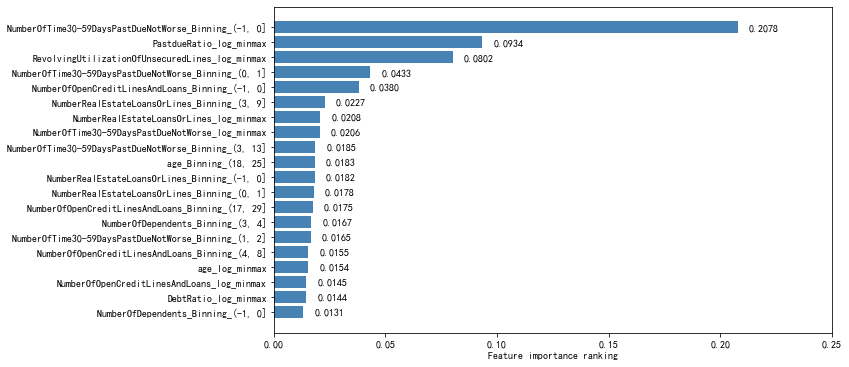

In [127]:
x = feature_importance2.shape[0]
# 缺失值比例可视化展示
# plt.style.use('ggplot')
fig = plt.figure(figsize=(10,6)) # 图形大小
plt.barh(range(x),feature_importance2['importance'],color= 'steelblue')

# 添加轴标签
plt.xlabel('Feature importance ranking')

# 添加刻度标签
columns1=feature_importance2.index.values.tolist() # 列名称
plt.yticks(range(x),columns1)

# 设置X轴的刻度范围
plt.xlim([0, 0.25])

# 显示数据标签
for x,y in enumerate(feature_importance2['importance']):
    plt.text(y + 0.005,x,'%.4f'%y, va='center')

## 4.4 数据不平衡处理    

### 4.4.1 查看数据分布

In [131]:
from collections import Counter
print(Counter(y))

Counter({0: 133660, 1: 9296})


### 4.4.2 SMOTE算法  

In [132]:
from imblearn.over_sampling import SMOTE

In [133]:
smo = SMOTE(random_state=42)
X_smo, y_smo = smo.fit_resample(X, y)

### 4.4.3 查看经过SMOTE之后的数据分布

In [134]:
print(Counter(y_smo))

Counter({1: 133660, 0: 133660})


### 4.4.4 修改原有数据

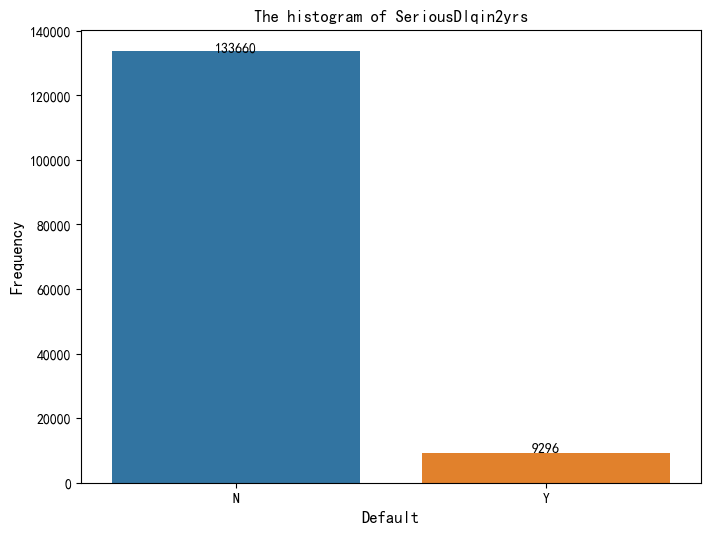

In [135]:
plt.figure(figsize=[8,6],dpi=100) 
g=sns.countplot(x='SeriousDlqin2yrs', data=df) 
plt.gca().set_xticklabels(['N', 'Y'])
plt.xlabel('Default', fontsize=12) 
plt.ylabel('Frequency', fontsize=12) 
plt.title('The histogram of SeriousDlqin2yrs')

for x,y in enumerate(df['SeriousDlqin2yrs'].value_counts()): 
     plt.text(x,y + 0.1,'%s' %round(y,1),ha='center')   
plt.show() 

* A.违约标识符

In [136]:
column_marker = ['SeriousDlqin2yrs']
smote_marker = pd.DataFrame(columns=column_marker,data=y_smo)
smote_marker

SeriousDlqin2yrs
0                      1
1                      0
2                      0
3                      0
4                      0
...                  ...
267315                 1
267316                 1
267317                 1
267318                 1
267319                 1

[267320 rows x 1 columns]

* B.特征

In [137]:
column_feature = df.drop(columns =['ID','SeriousDlqin2yrs']).columns
smote_feature = pd.DataFrame(columns=column_feature,data=X_smo)
smote_feature

NumberOfDependents_Binning_(-1, 0]  NumberOfDependents_Binning_(0, 1]  \
0                                      0.0                                0.0   
1                                      0.0                                1.0   
2                                      1.0                                0.0   
3                                      1.0                                0.0   
4                                      0.0                                1.0   
...                                    ...                                ...   
267315                                 0.0                                0.0   
267316                                 1.0                                0.0   
267317                                 1.0                                0.0   
267318                                 0.0                                0.0   
267319                                 1.0                                0.0   

        NumberOfDependents_Binning_(1, 2]  NumberOfDependents_Binning_(2, 3]  \
0                                     1.0                                0.0   
1                                     0.0                                0.0   
2                                     0.0                                0.0   
3                                     0.0                                0.0   
4                                     0.0                                0.0   
...                                   ...                                ...   
267315                                1.0                                0.0   
267316                                0.0                                0.0   
267317                                0.0                                0.0   
267318                                0.0                                1.0   
267319                                0.0                                0.0   

        NumberOfDependents_Binning_(3, 4]  NumberOfDependents_Binning_(4, 9]  \
0                                     0.0                                0.0   
1                                     0.0                                0.0   
2                                     0.0                                0.0   
3                                     0.0                                0.0   
4                                     0.0                                0.0   
...                                   ...                                ...   
267315                                0.0                                0.0   
267316                                0.0                                0.0   
267317                                0.0                                0.0   
267318                                0.0                                0.0   
267319                                0.0                                0.0   

        age_Binning_(18, 25]  age_Binning_(25, 35]  age_Binning_(35, 45]  \
0                        0.0                   0.0                   1.0   
1                        0.0                   0.0                   1.0   
2                        0.0                   0.0                   1.0   
3                        0.0                   1.0                   0.0   
4                        0.0                   0.0                   0.0   
...                      ...                   ...                   ...   
267315                   0.0                   1.0                   0.0   
267316                   0.0                   0.0                   0.0   
267317                   0.0                   0.0                   0.0   
267318                   0.0                   0.0                   0.0   
267319                   0.0                   0.0                   0.0   

        age_Binning_(45, 55]  ...  \
0                        0.0  ...   
1                        0.0  ...   
2                        0.0  ...   
3                        0.0  ...   
4              

* C.ID

In [138]:
df2 = pd.concat([smote_marker, smote_feature], axis = 1) 
df2

SeriousDlqin2yrs  NumberOfDependents_Binning_(-1, 0]  \
0                      1                                 0.0   
1                      0                                 0.0   
2                      0                                 1.0   
3                      0                                 1.0   
4                      0                                 0.0   
...                  ...                                 ...   
267315                 1                                 0.0   
267316                 1                                 1.0   
267317                 1                                 1.0   
267318                 1                                 0.0   
267319                 1                                 1.0   

        NumberOfDependents_Binning_(0, 1]  NumberOfDependents_Binning_(1, 2]  \
0                                     0.0                                1.0   
1                                     1.0                                0.0   
2                                     0.0                                0.0   
3                                     0.0                                0.0   
4                                     1.0                                0.0   
...                                   ...                                ...   
267315                                0.0                                1.0   
267316                                0.0                                0.0   
267317                                0.0                                0.0   
267318                                0.0                                0.0   
267319                                0.0                                0.0   

        NumberOfDependents_Binning_(2, 3]  NumberOfDependents_Binning_(3, 4]  \
0                                     0.0                                0.0   
1                                     0.0                                0.0   
2                                     0.0                                0.0   
3                                     0.0                                0.0   
4                                     0.0                                0.0   
...                                   ...                                ...   
267315                                0.0                                0.0   
267316                                0.0                                0.0   
267317                                0.0                                0.0   
267318                                1.0                                0.0   
267319                                0.0                                0.0   

        NumberOfDependents_Binning_(4, 9]  age_Binning_(18, 25]  \
0                                     0.0                   0.0   
1                                     0.0                   0.0   
2                                     0.0                   0.0   
3                                     0.0                   0.0   
4                                     0.0                   0.0   
...                                   ...                   ...   
267315                                0.0                   0.0   
267316                                0.0                   0.0   
267317                                0.0                   0.0   
267318                                0.0                   0.0   
267319                                0.0                   0.0   

        age_Binning_(25, 35]  age_Binning_(35, 45]  ...  \
0                        0.0                   1.0  ...   
1                        0.0                   1.0  ...   
2                        0.0                   1.0  ...   
3                        1.0                   0.0  ...   
4                        0.0                   0.0  ...   
...                      ...                   ...  ...   
267315                   1.0                   0.0  ...   
267316                   0.0            

In [139]:
important_features = ['NumberOfDependents_Binning_(-1, 0]','PastdueRatio_log_minmax','RevolvingUtilizationOfUnsecuredLines_log_minmax',
                      'NumberOfTime30-59DaysPastDueNotWorse_Binning_(0, 1]','NumberOfOpenCreditLinesAndLoans_Binning_(-1, 0]','NumberRealEstateLoansOrLines_Binning_(3, 9]',
                      'NumberRealEstateLoansOrLines_log_minmax','NumberOfTime30-59DaysPastDueNotWorse_log_minmax','NumberOfTime30-59DaysPastDueNotWorse_Binning_(3, 13]',
                      'age_Binning_(18, 25]','NumberRealEstateLoansOrLines_Binning_(-1, 0]','NumberRealEstateLoansOrLines_Binning_(0, 1]',
                      'NumberOfOpenCreditLinesAndLoans_Binning_(17, 29]','NumberOfDependents_Binning_(3, 4]','NumberOfTime30-59DaysPastDueNotWorse_Binning_(1, 2]',
                      'NumberOfOpenCreditLinesAndLoans_Binning_(4, 8]','age_log_minmax','NumberOfOpenCreditLinesAndLoans_log_minmax',
                      'DebtRatio_log_minmax','NumberOfDependents_Binning_(-1, 0]'
                     ]

In [148]:
df3 = df2[important_features]
df3.to_csv('./data_after_preprocessing.csv')
df3

NumberOfDependents_Binning_(-1, 0]  PastdueRatio_log_minmax  \
0                                      0.0                 0.000000   
1                                      0.0                 0.000000   
2                                      1.0                 0.000000   
3                                      1.0                 0.000000   
4                                      0.0                 0.000000   
...                                    ...                      ...   
267315                                 0.0                 0.152109   
267316                                 1.0                 0.000000   
267317                                 1.0                 0.000000   
267318                                 0.0                 0.000000   
267319                                 1.0                 0.000000   

        RevolvingUtilizationOfUnsecuredLines_log_minmax  \
0                                              0.650108   
1                                              0.767492   
2                                              0.578023   
3                                              0.240145   
4                                              0.220872   
...                                                 ...   
267315                                         0.000000   
267316                                         0.106844   
267317                                         0.626375   
267318                                         0.033406   
267319                                         0.697758   

        NumberOfTime30-59DaysPastDueNotWorse_Binning_(0, 1]  \
0                                                0.000000     
1                                                0.000000     
2                                                1.000000     
3                                                0.000000     
4                                                0.000000     
...                                                   ...     
267315                                           1.000000     
267316                                           0.688147     
267317                                           0.000000     
267318                                           0.000000     
267319                                           0.000000     

        NumberOfOpenCreditLinesAndLoans_Binning_(-1, 0]  \
0                                                   0.0   
1                                                   0.0   
2                                                   0.0   
3                                                   0.0   
4                                                   0.0   
...                                                 ...   
267315                                              0.0   
267316                                              0.0   
267317                                              0.0   
267318                                              0.0   
267319                                              0.0   

        NumberRealEstateLoansOrLines_Binning_(3, 9]  \
0                                               1.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   
...                                             ...   
267315                                          0.0   
267316                                          0.0   
267317                                          0.0   
267318                                          0.0   
267319                                          0.0   

        NumberRealEstateLoansOrLines_log_minmax  \
0                                      0.845098   
1                                      0.000000   
2                                      0.000000   
3                                      0.000000   
4                                      0.301030   
...          

* SMOTE处理之后的数据分布情况

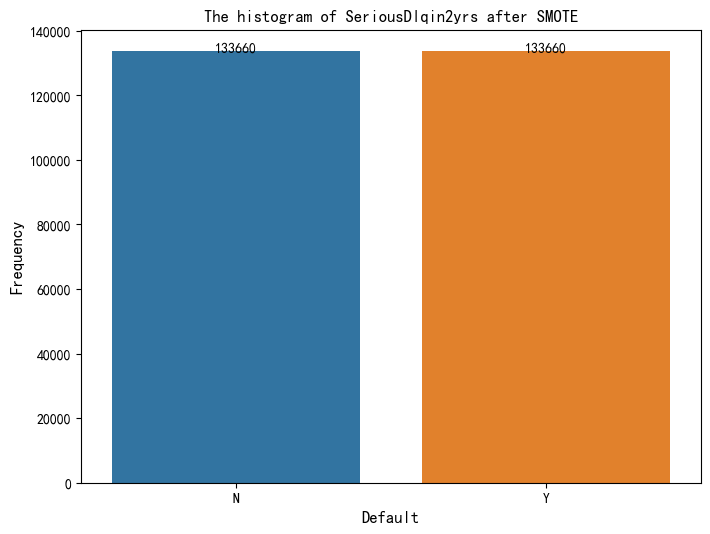

In [146]:
plt.figure(figsize=[8,6],dpi=100) 
g=sns.countplot(x='SeriousDlqin2yrs', data=df2) 
plt.gca().set_xticklabels(['N', 'Y'])
plt.xlabel('Default', fontsize=12) 
plt.ylabel('Frequency', fontsize=12) 
plt.title('The histogram of SeriousDlqin2yrs after SMOTE')

for x,y in enumerate(df2['SeriousDlqin2yrs'].value_counts()): 
     plt.text(x,y + 0.1,'%s' %round(y,1),ha='center')   
plt.show() 

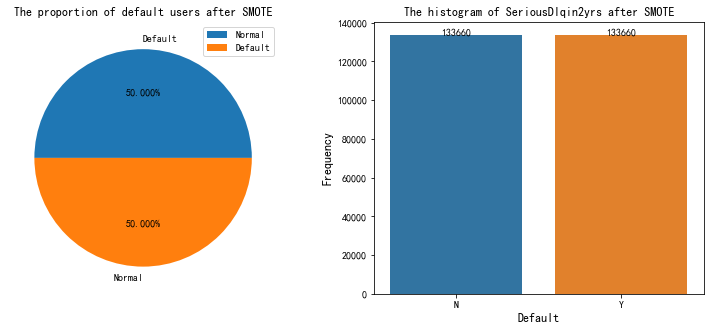

In [147]:
# 饼图
plt.figure(figsize=(13, 5))
plt.subplot(121)
labels = ['Normal','Default']
# 统计违约用户和正常用户数量
counts2 = df2.SeriousDlqin2yrs.value_counts()

# 绘制饼图
plt.pie(x = counts2, # 绘图数据
        labels=pd.Series(counts2.index).map({1:'Default',0:'Normal'}), # 添加文字标签
        autopct='%.3f%%' # 设置百分比的格式，这里保留一位小数
       )
plt.legend(labels,bbox_to_anchor=(1, 1), loc= 'upper right', borderaxespad=0.5)
plt.title('The proportion of default users after SMOTE')



# 直方图
plt.subplot(122)
g=sns.countplot(x='SeriousDlqin2yrs', data=df2) 
plt.gca().set_xticklabels(['N', 'Y'])
plt.xlabel('Default', fontsize=12) 
plt.ylabel('Frequency', fontsize=12) 
plt.title('The histogram of SeriousDlqin2yrs after SMOTE')

for x,y in enumerate(df2['SeriousDlqin2yrs'].value_counts()): 
     plt.text(x,y + 0.1,'%s' %round(y,1),ha='center')   

## 4.5 单一模型的训练和评价